## Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
from multiprocessing import Pool

import modeling
import helpers
import plotting
import scienceplots
plt.style.use(['science','no-latex'])
# plt.style.use(['science','ieee','no-latex'])

## Load data

In [2]:
with open('data.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    all_data = data_dict['data']
    meta_data = data_dict['meta_data']

# Plot learning curves

## All clusters

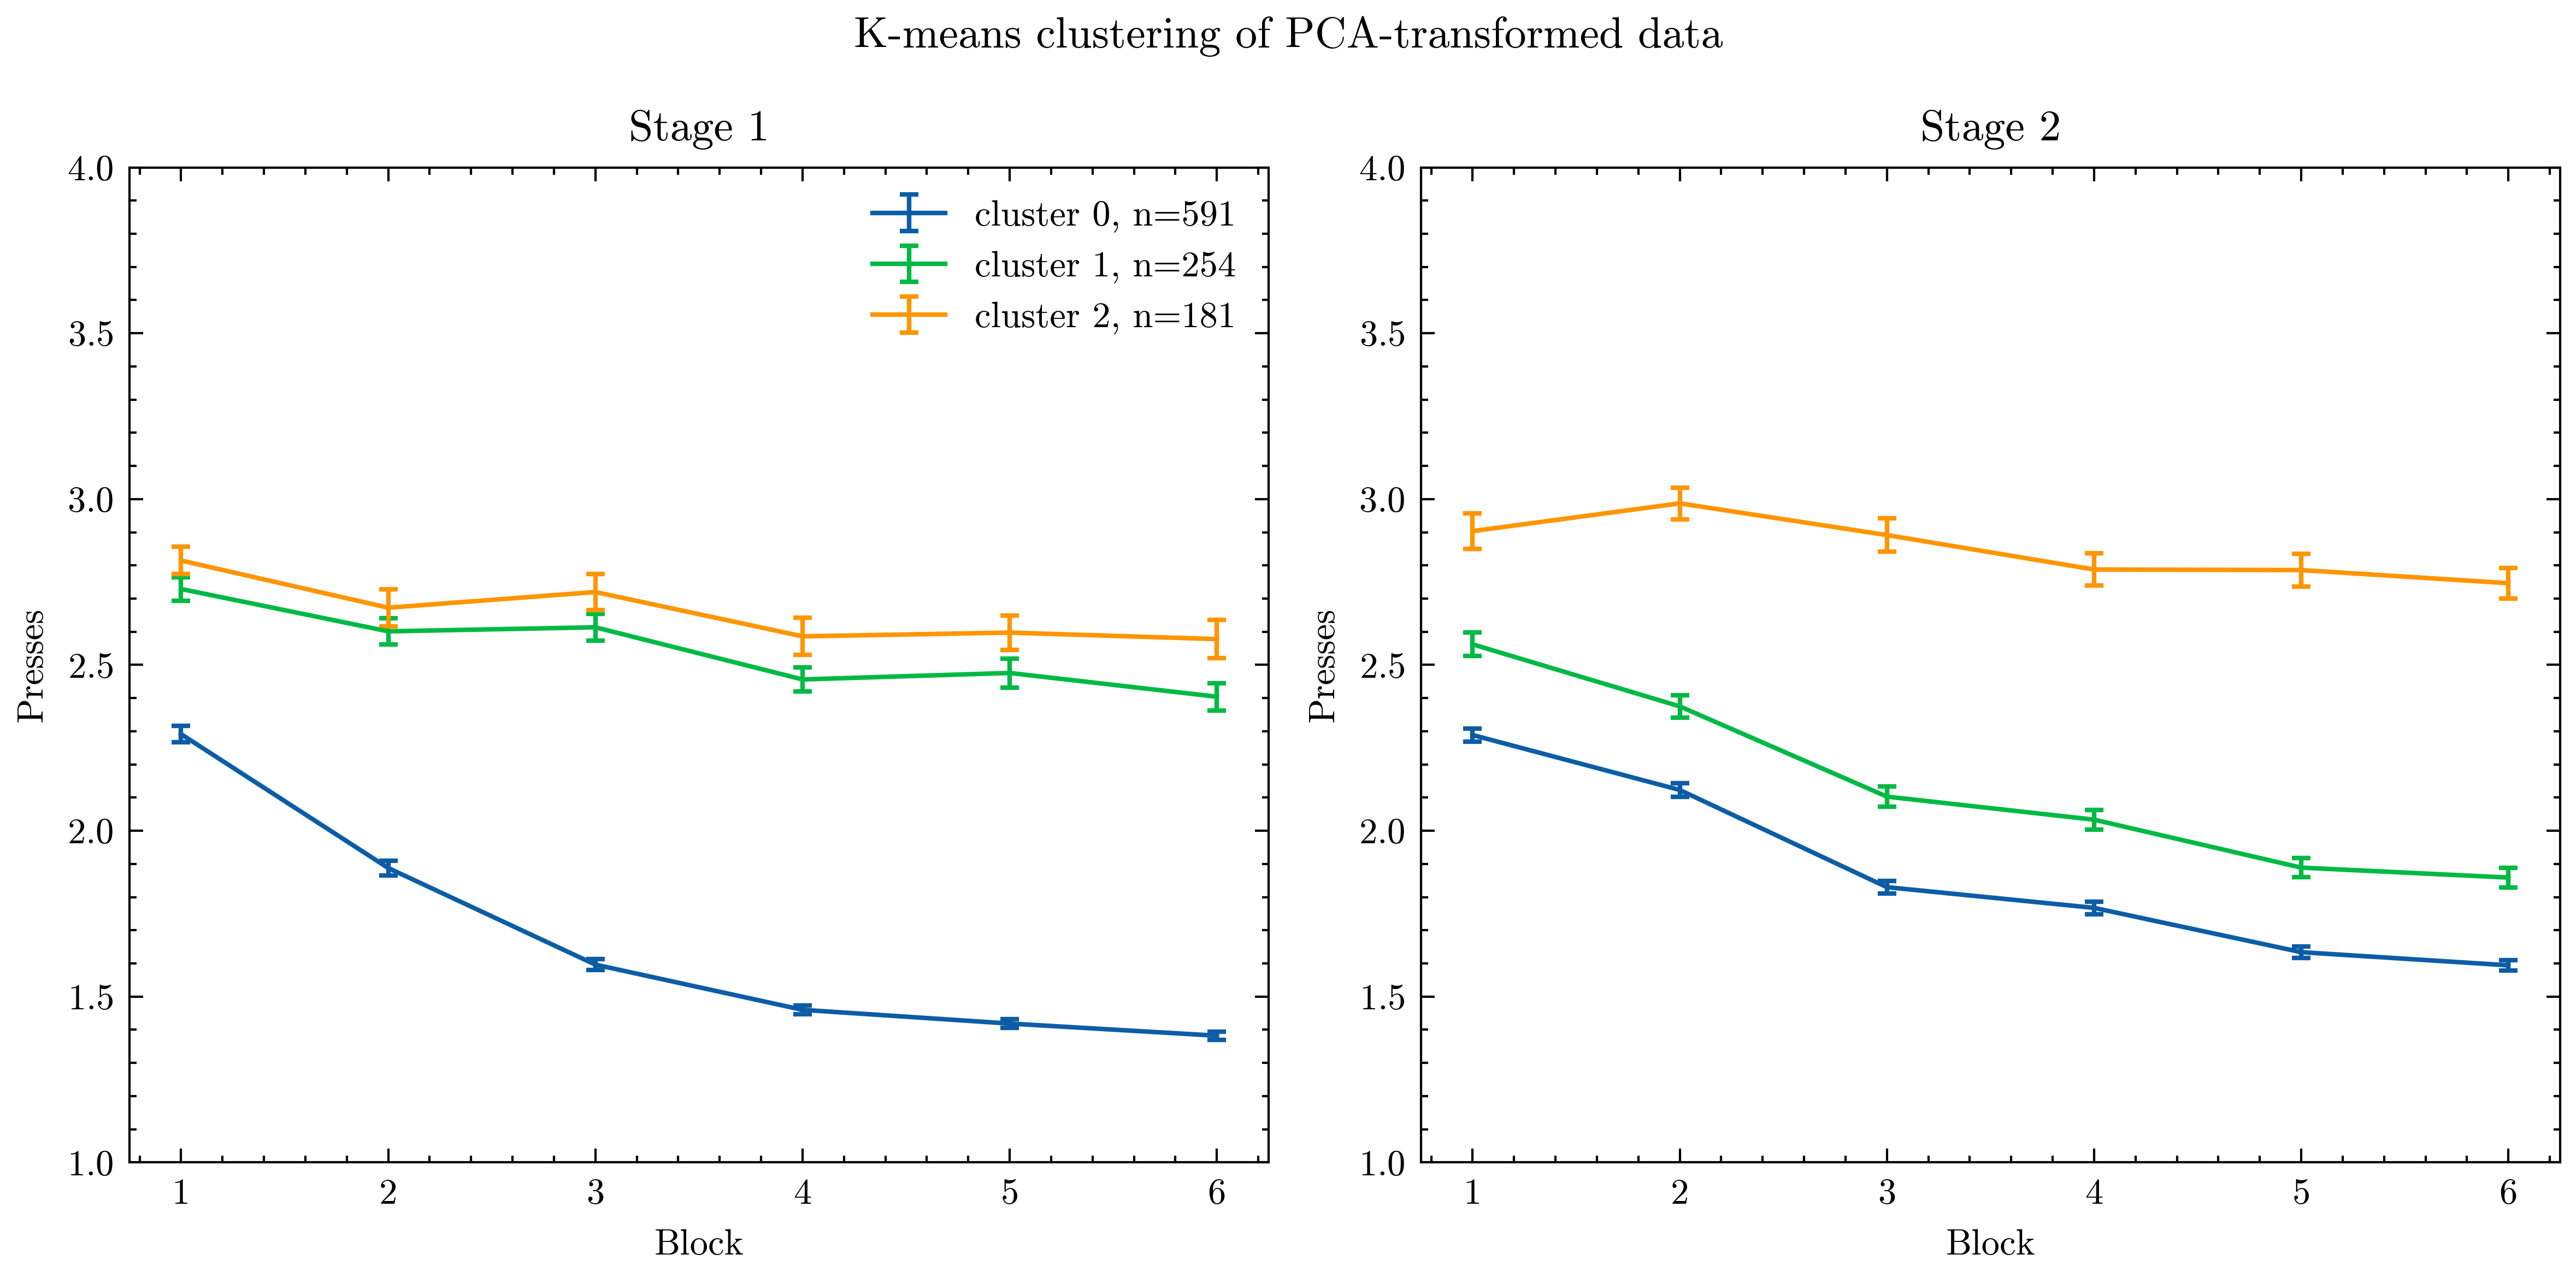

In [87]:
K = len(np.unique(meta_data['Cluster']))
blocks = np.arange(1,7)
fig, axes = plt.subplots(1,2,figsize=(8,4))
mean_population_counter1, mean_population_counter2 = helpers.calc_mean(all_data, trials_to_probe=10, start_trial=0)
mean_population_counter1 = mean_population_counter1[:,:6]
mean_population_counter2 = mean_population_counter2[:,:6]
for i in range(K):
    this_clu_size = np.sum(meta_data['Cluster']==i)
    axes[0].errorbar(blocks, 
                np.nanmean(mean_population_counter1[meta_data['Cluster']==i],axis=0),
                stats.sem(mean_population_counter1[meta_data['Cluster']==i],axis=0,nan_policy='omit'),
                capsize=2, label='cluster '+str(i)+', n='+str(this_clu_size))
    axes[1].errorbar(blocks, 
                np.nanmean(mean_population_counter2[meta_data['Cluster']==i],axis=0),
                stats.sem(mean_population_counter2[meta_data['Cluster']==i],axis=0,nan_policy='omit'),
                capsize=2, label='cluster '+str(i)+', n='+str(this_clu_size))
    
axes[0].set_xticks(blocks,blocks)
axes[1].set_xticks(blocks,blocks)
axes[0].set_xlabel('Block')
axes[1].set_xlabel('Block')
axes[0].set_ylabel('Presses')
axes[1].set_ylabel('Presses')
axes[0].set_ylim([1,4])
axes[1].set_ylim([1,4])
axes[0].legend()
axes[0].set_title('Stage 1')
axes[1].set_title('Stage 2')

plt.suptitle(f'K-means clustering of PCA-transformed data')
plt.tight_layout()
plt.savefig('plots/learning_curves_all_clusters.svg', format='svg', dpi=1200)

## Cluster 0

### V1-V1, V1-V2, V1-V3

One-sided paired t-test between Blocks 7 and 11 for V1-V1:
Ttest_relResult(statistic=3.283914044098074, pvalue=0.0006416779671005344)

One-sided paired t-test between Blocks 7 and 11 for V1-V2:
Ttest_relResult(statistic=4.167098371054818, pvalue=3.8356486884551844e-05)

One-sided t-test between V1-V1 and V1-V2 on Block 11:
Ttest_indResult(statistic=-0.08982838090949341, pvalue=0.5357484239894076)

One-sided paired t-test between Blocks 7 and 11 for V1-V3:
Ttest_relResult(statistic=2.607200072394568, pvalue=0.0057502145042932)

One-sided t-test between V1-V2 and V1-V3 on Block 11:
Ttest_indResult(statistic=-0.4353976055159475, pvalue=0.6680301952889423)


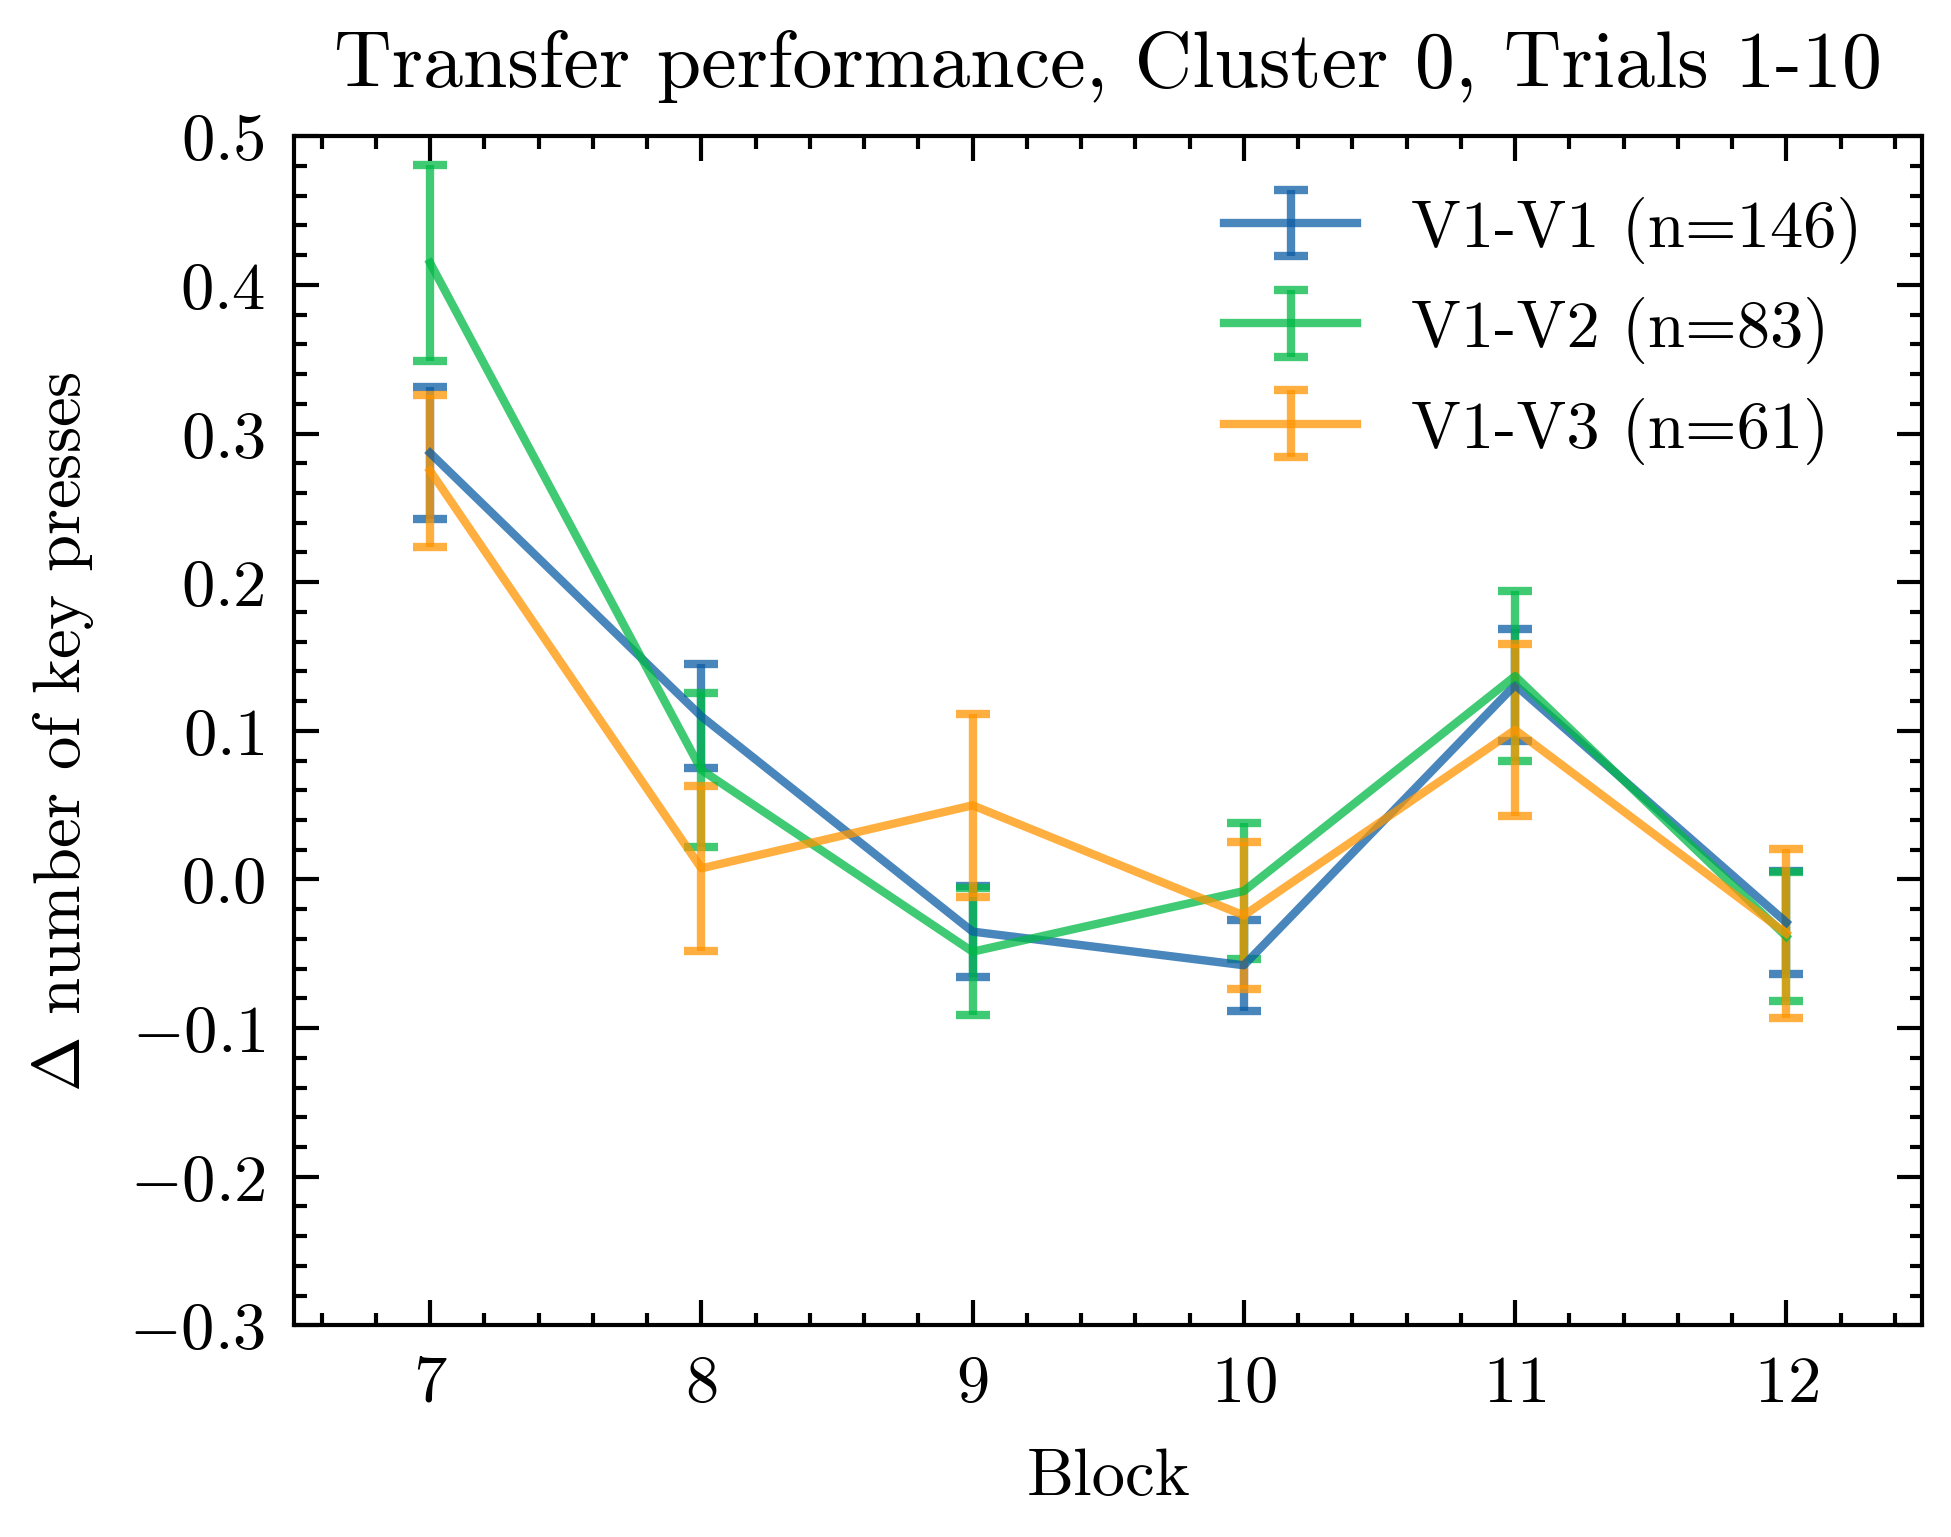

In [88]:
plotting.plot_transfer_learning_curves(all_data, meta_data, 'V1-V1', 'V1-V2', 'V1-V3', exp=[1,2], cluster=0, start_trial=0, trials_to_probe=10, first_press_accuracy=False, save_vector=True)

### V2-V1, V2-V2

/Users/JingjingLi/My Drive/Berkeley/CCN lab/OT-CA/OT-CA Jingjing/learning_hierarchy/helpers.py:918: RuntimeWarning: Mean of empty slice
  mean_population_counter1 = np.hstack((mean_population_counter1_12, np.nanmean(data_counter1[:,:,start_trial:int(start_trial+trials_to_probe)],axis=2)))
/Users/JingjingLi/My Drive/Berkeley/CCN lab/OT-CA/OT-CA Jingjing/learning_hierarchy/helpers.py:913: RuntimeWarning: Mean of empty slice
  mean_population_counter1_12[sub,0] = np.nanmean(data_counter12_12[sub,0,0,start_trial:int(start_trial+trials_to_probe)])


One-sided paired t-test between Blocks 7 and 11 for V2-V1:
Ttest_relResult(statistic=2.36058166887825, pvalue=0.010267591972178903)

One-sided paired t-test between Blocks 7 and 11 for V2-V2:
Ttest_relResult(statistic=2.494859579337248, pvalue=0.007385472389250694)

One-sided t-test between V2-V1 and V2-V2 on Block 11:
Ttest_indResult(statistic=-1.3407931140774354, pvalue=0.9090618443178253)



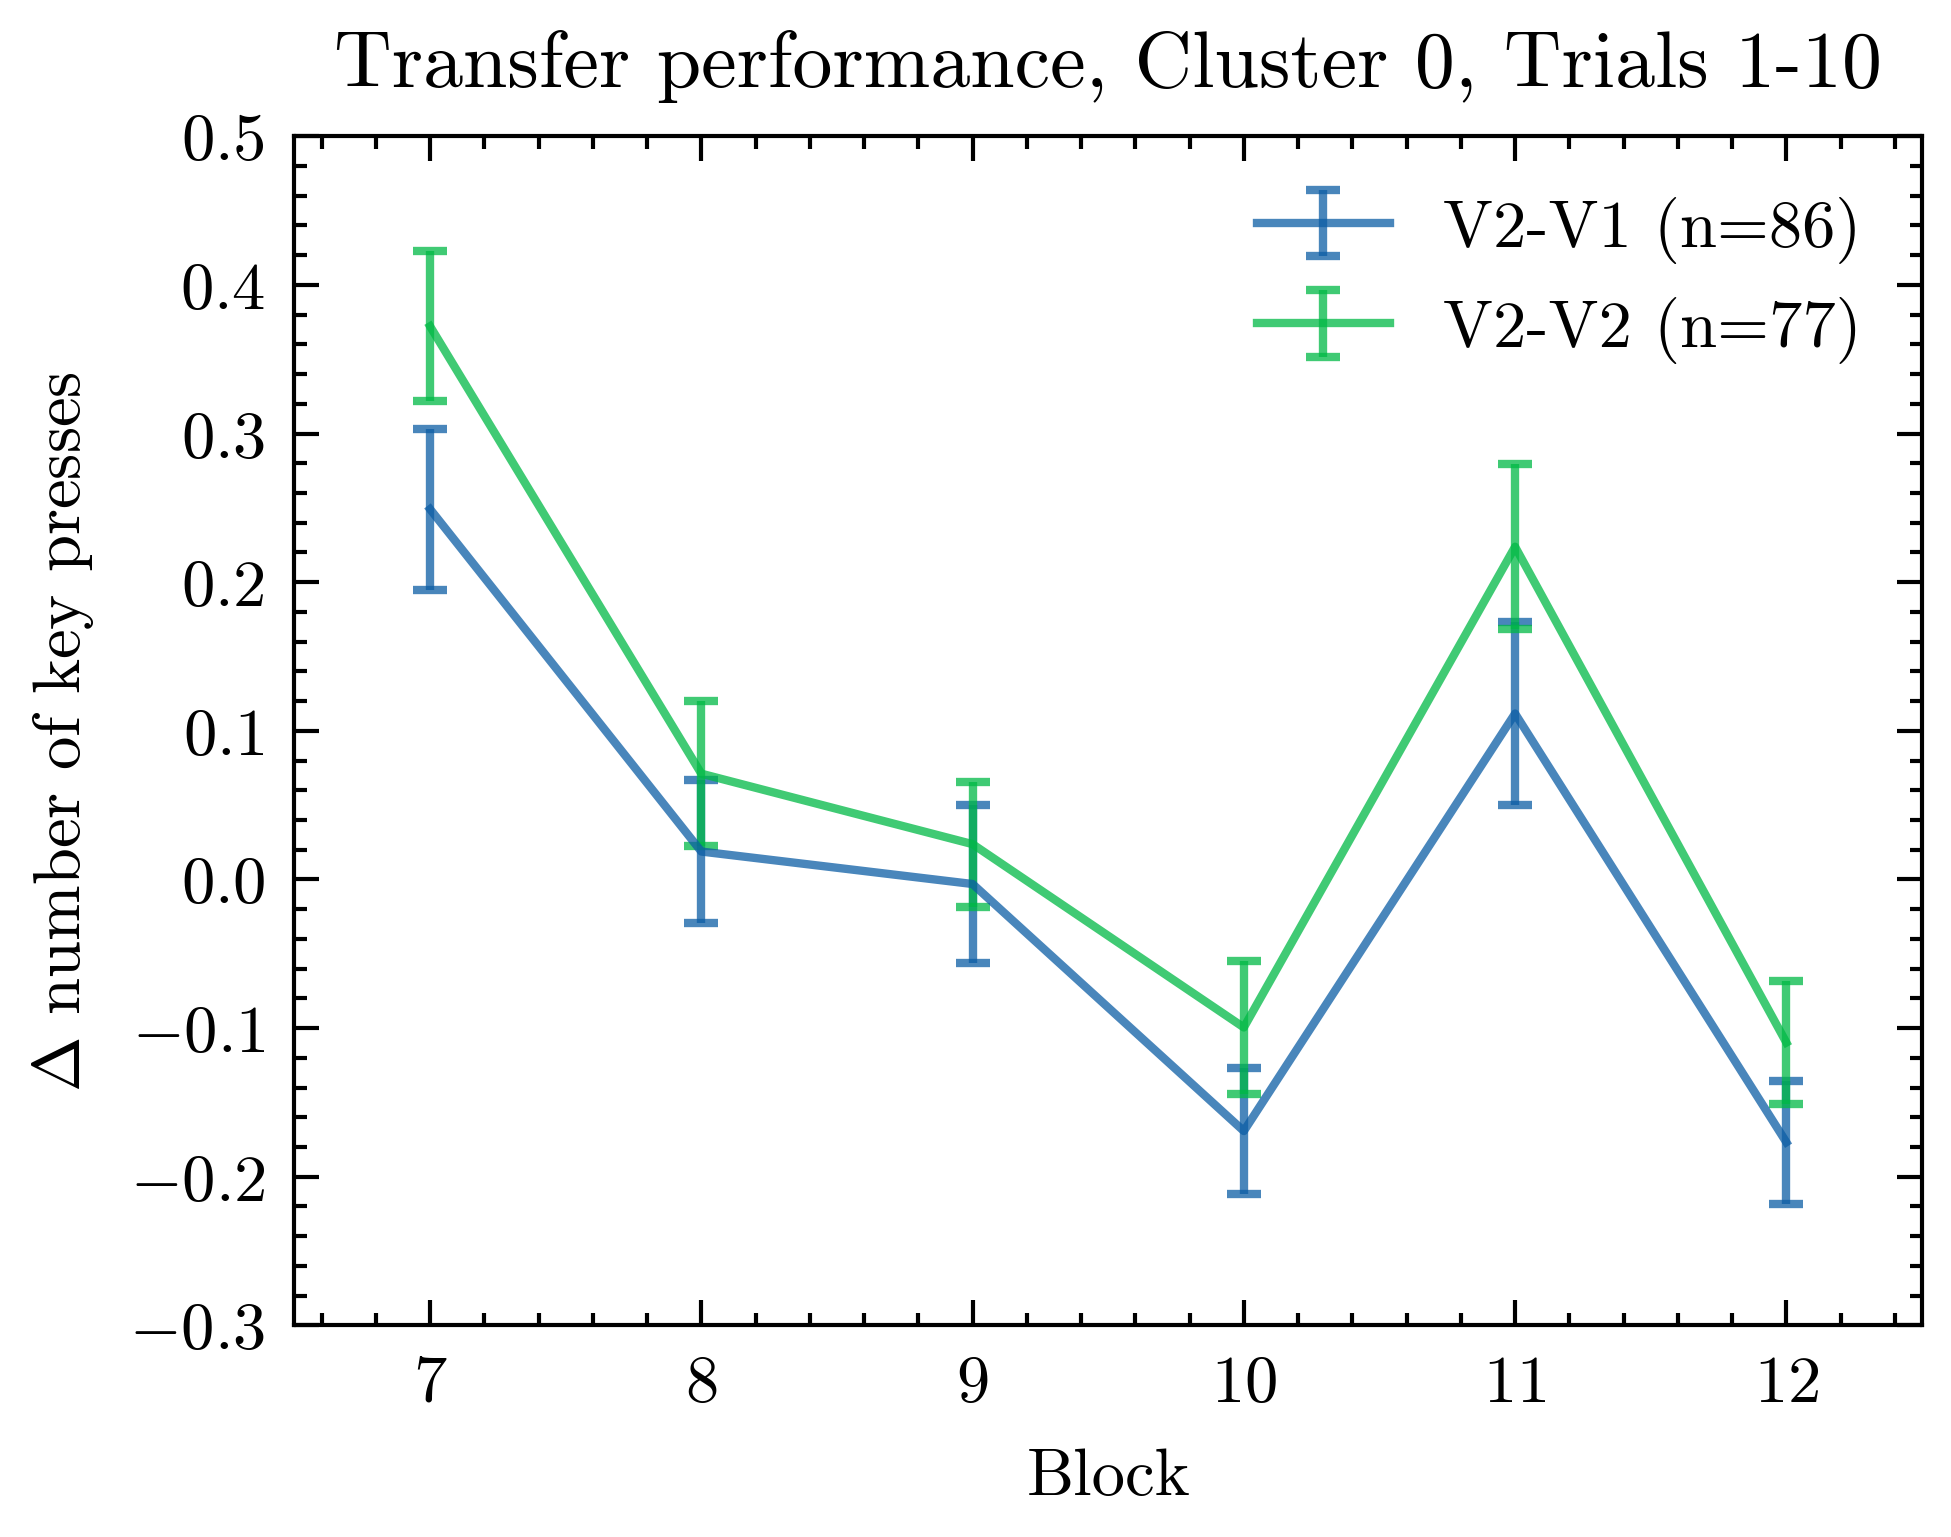

In [71]:
plotting.plot_transfer_learning_curves(all_data, meta_data, 'V2-V1', 'V2-V2', '', exp=[1,2], cluster=0, start_trial=0, trials_to_probe=10, first_press_accuracy=False, save_vector=True)

### V3-V1, V3-V3

One-sided paired t-test between Blocks 7 and 11 for V3-V1:
Ttest_relResult(statistic=0.6303988487002837, pvalue=0.26513814765319077)

One-sided paired t-test between Blocks 7 and 11 for V3-V3:
Ttest_relResult(statistic=5.588514712740049, pvalue=3.214475018762866e-07)

One-sided t-test between V3-V1 and V3-V3 on Block 11:
Ttest_indResult(statistic=3.8866284121353485, pvalue=7.909118752547966e-05)



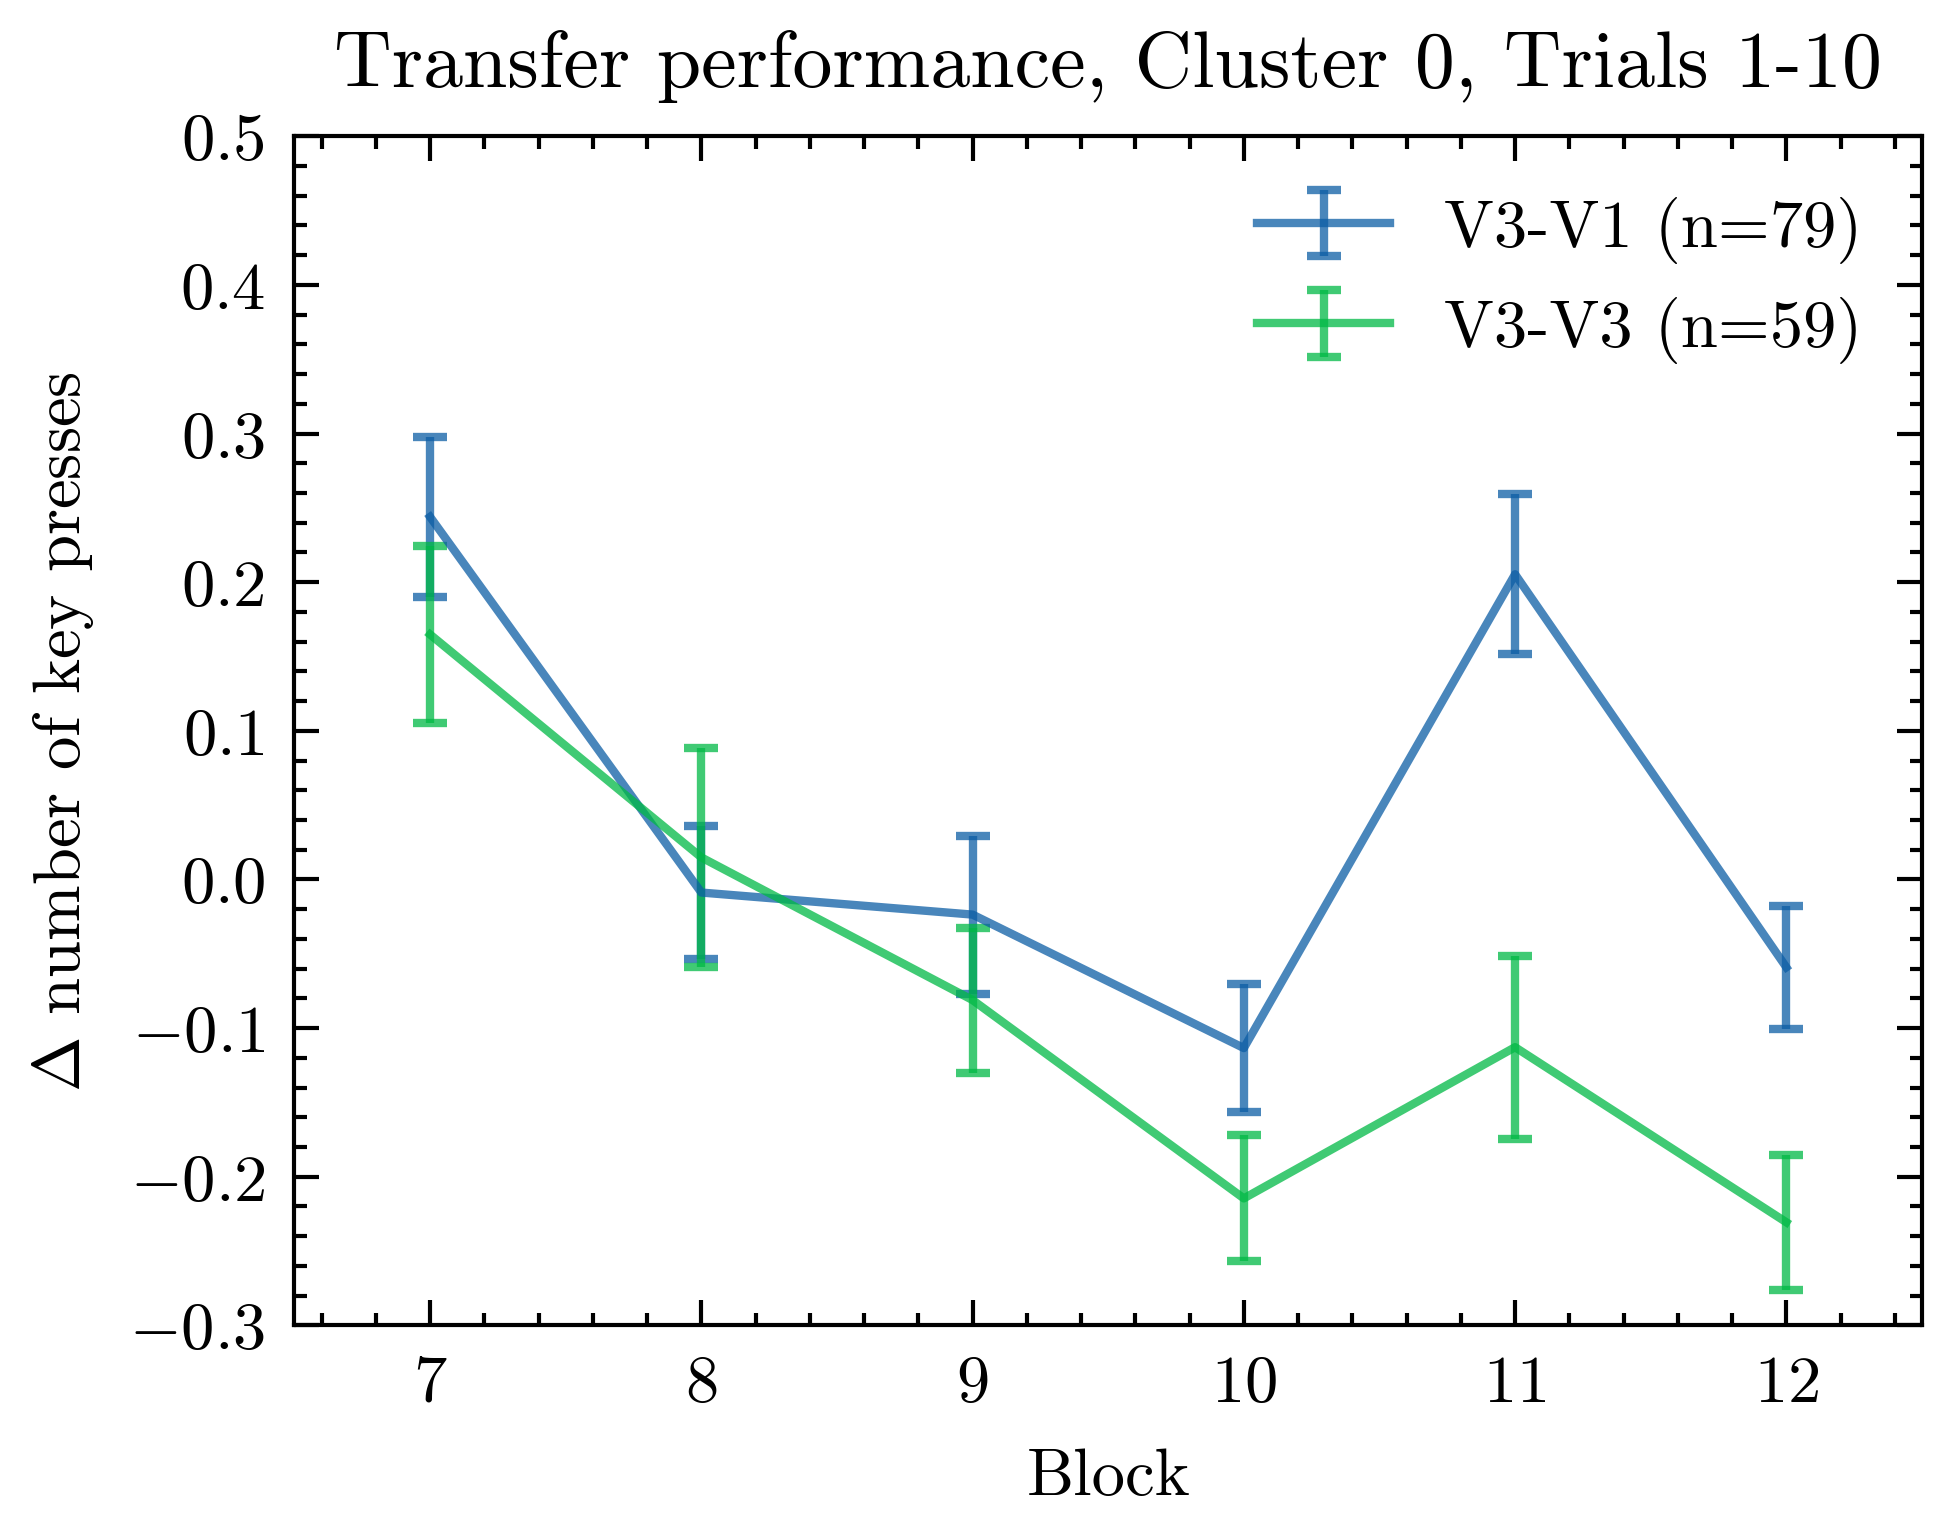

In [69]:
plotting.plot_transfer_learning_curves(all_data, meta_data, 'V3-V1', 'V3-V3', '', exp=[1,2], cluster=0, start_trial=0, trials_to_probe=10, first_press_accuracy=False, save_vector=True)

### V1-V1, V2-V1, V3-V1

/Users/JingjingLi/My Drive/Berkeley/CCN lab/OT-CA/OT-CA Jingjing/learning_hierarchy/helpers.py:918: RuntimeWarning: Mean of empty slice
  mean_population_counter1 = np.hstack((mean_population_counter1_12, np.nanmean(data_counter1[:,:,start_trial:int(start_trial+trials_to_probe)],axis=2)))
/Users/JingjingLi/My Drive/Berkeley/CCN lab/OT-CA/OT-CA Jingjing/learning_hierarchy/helpers.py:913: RuntimeWarning: Mean of empty slice
  mean_population_counter1_12[sub,0] = np.nanmean(data_counter12_12[sub,0,0,start_trial:int(start_trial+trials_to_probe)])


One-sided paired t-test between Blocks 7 and 11 for V2-V1:
Ttest_relResult(statistic=2.36058166887825, pvalue=0.010267591972178903)

One-sided paired t-test between Blocks 7 and 11 for V3-V1:
Ttest_relResult(statistic=0.6303988487002837, pvalue=0.26513814765319077)

One-sided t-test between V2-V1 and V3-V1 on Block 11:
Ttest_indResult(statistic=-1.1369935482820304, pvalue=0.8713951589552849)



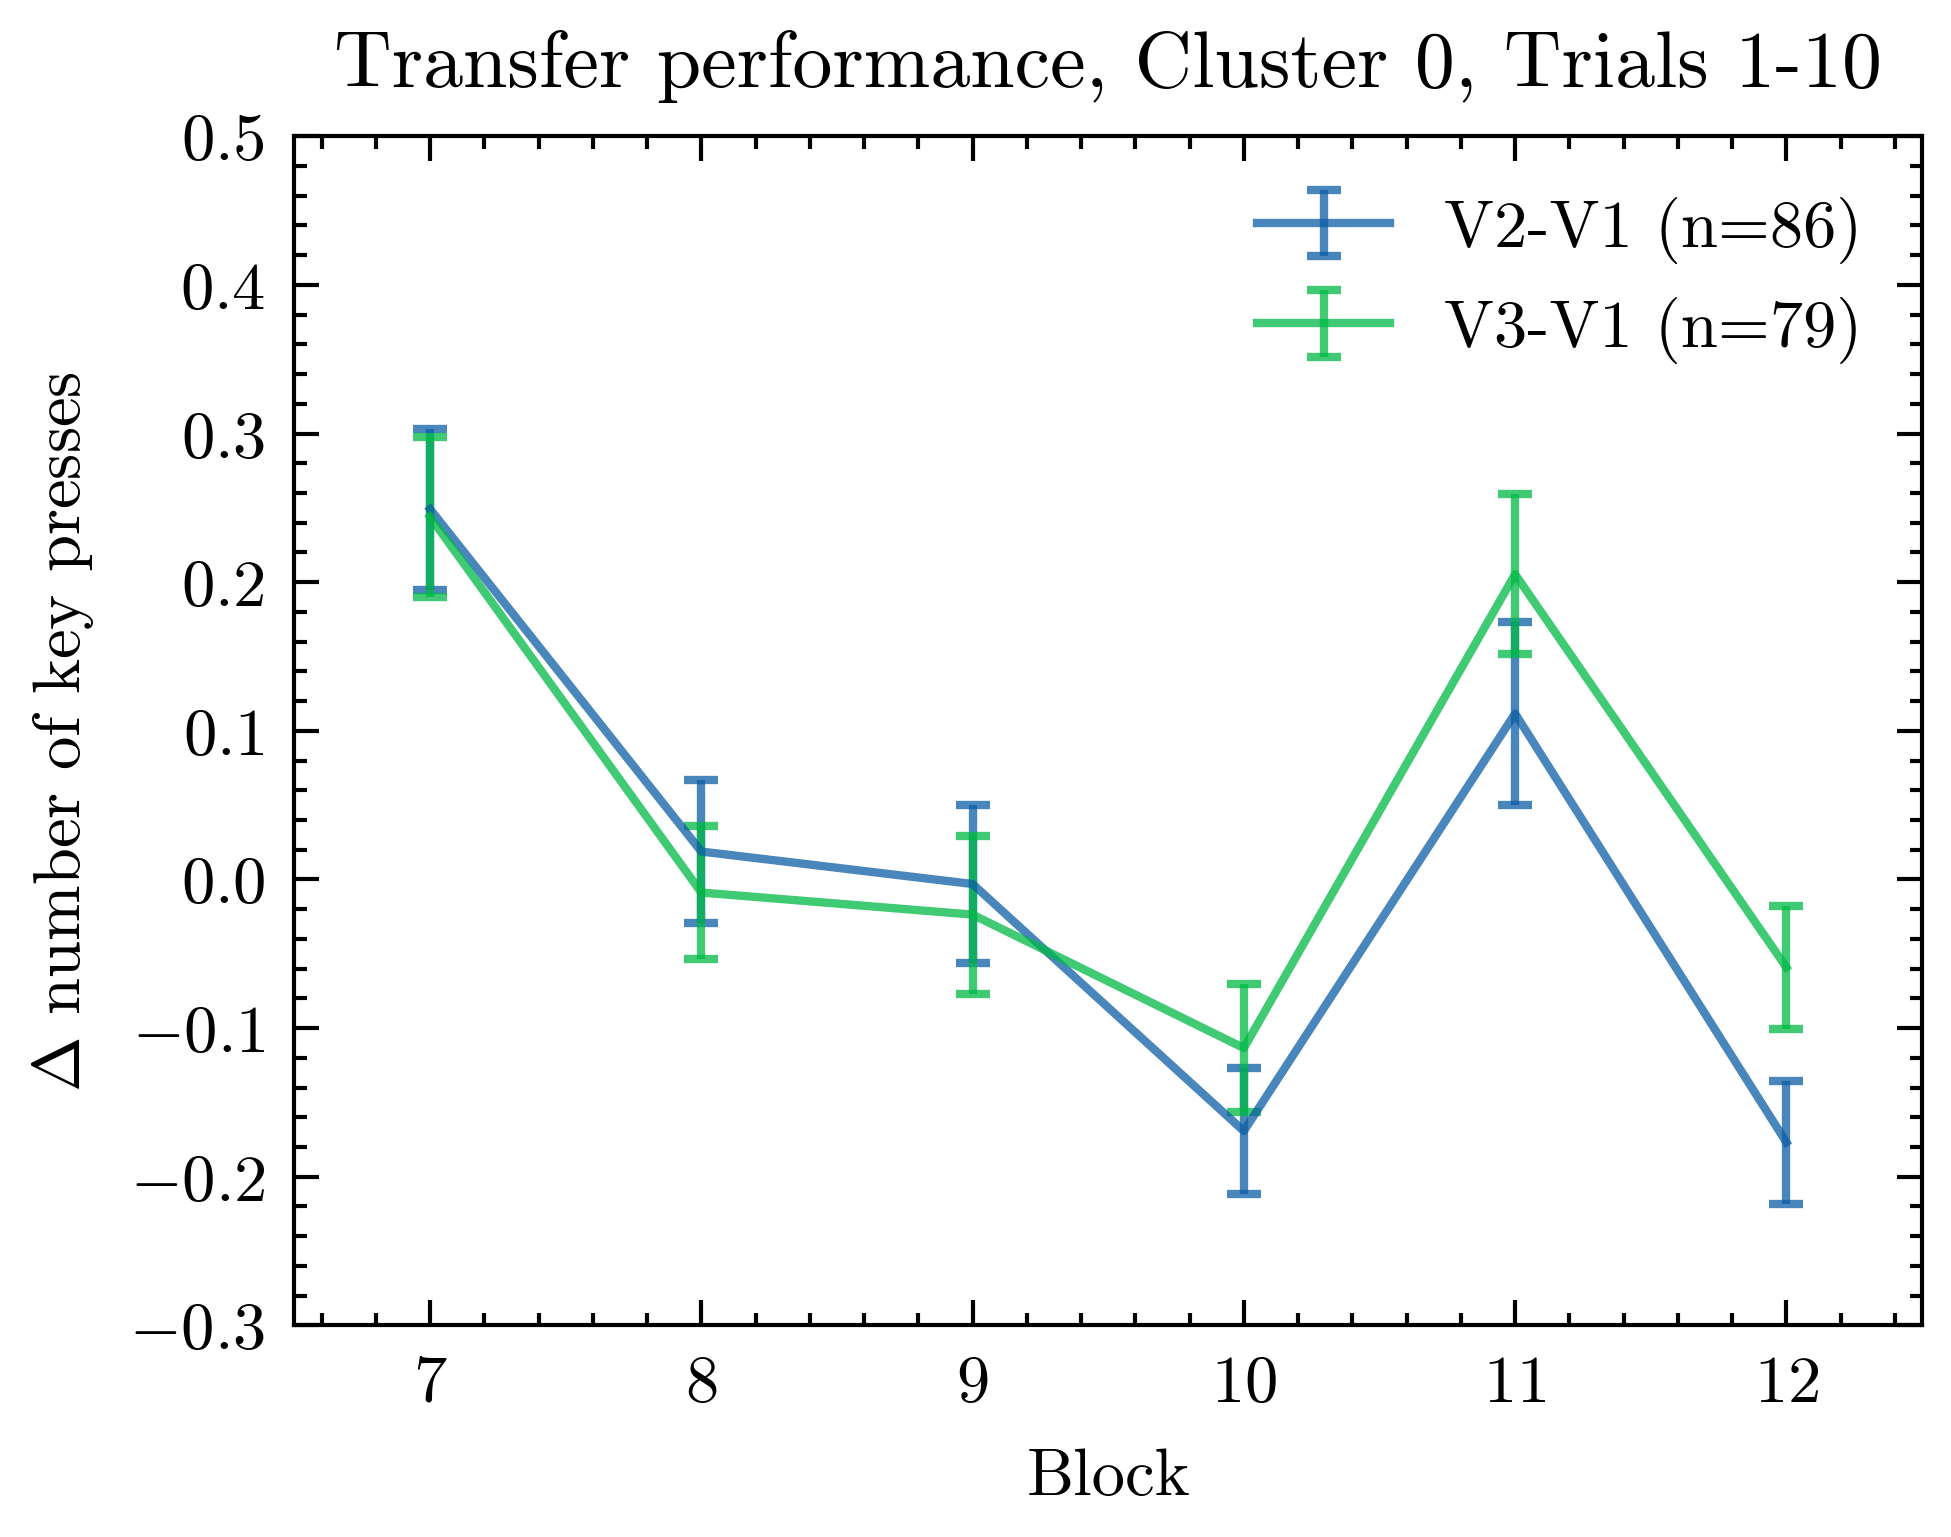

In [75]:
plotting.plot_transfer_learning_curves(all_data, meta_data, 'V2-V1', 'V3-V1', '', exp=[1,2], cluster=0, start_trial=0, trials_to_probe=10, first_press_accuracy=False, save_vector=True)

In [80]:
import pandas as pd
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

data_1 = helpers.slice_data(all_data, meta_data, 'V2-V1', exp=[1,2], cluster=0)
num_subjects_1 = data_1['tr'].shape[0]
_, n_presses_stage_2_1 = helpers.calc_mean(data_1, start_trial=0, trials_to_probe=10)
n_presses_stage_2_1 -= np.nanmean(n_presses_stage_2_1[:,4:6], axis=1).reshape(-1,1)
n_presses_stage_2_1 = n_presses_stage_2_1[~np.isnan(np.sum(n_presses_stage_2_1[:,[6,10]],axis=1))]

data_2 = helpers.slice_data(all_data, meta_data, 'V3-V1', exp=[1,2], cluster=0)
num_subjects_2 = data_2['tr'].shape[0]
_, n_presses_stage_2_2 = helpers.calc_mean(data_2, start_trial=0, trials_to_probe=10)
n_presses_stage_2_2 -= np.nanmean(n_presses_stage_2_2[:,4:6], axis=1).reshape(-1,1)
n_presses_stage_2_2 = n_presses_stage_2_2[~np.isnan(np.sum(n_presses_stage_2_2[:,[6,10]],axis=1))]

df = pd.DataFrame({'n_presses': np.concatenate([n_presses_stage_2_1[:,6],n_presses_stage_2_1[:,10], 
                                                n_presses_stage_2_2[:,6],n_presses_stage_2_2[:,10]]),
                     'condition': np.concatenate([np.repeat('V2-V1',num_subjects_1*2), np.repeat('V3-V1',num_subjects_2*2)]),
                     'block': np.concatenate([np.ones(num_subjects_1)*7, np.ones(num_subjects_1)*11, np.ones(num_subjects_2)*7, np.ones(num_subjects_2)*11])})

# Performing two-way ANOVA 
model = ols('n_presses ~ C(condition) + C(block) + C(condition):C(block)', data=df).fit() 
result = sm.stats.anova_lm(model, type=2) 

print(result)

                          df     sum_sq   mean_sq         F    PR(>F)
C(condition)             1.0   0.161388  0.161388  0.618886  0.432033
C(block)                 1.0   0.670609  0.670609  2.571628  0.109764
C(condition):C(block)    1.0   0.201400  0.201400  0.772321  0.380147
Residual               326.0  85.011751  0.260772       NaN       NaN


/Users/JingjingLi/My Drive/Berkeley/CCN lab/OT-CA/OT-CA Jingjing/learning_hierarchy/helpers.py:918: RuntimeWarning: Mean of empty slice
  mean_population_counter1 = np.hstack((mean_population_counter1_12, np.nanmean(data_counter1[:,:,start_trial:int(start_trial+trials_to_probe)],axis=2)))
/Users/JingjingLi/My Drive/Berkeley/CCN lab/OT-CA/OT-CA Jingjing/learning_hierarchy/helpers.py:913: RuntimeWarning: Mean of empty slice
  mean_population_counter1_12[sub,0] = np.nanmean(data_counter12_12[sub,0,0,start_trial:int(start_trial+trials_to_probe)])


### V1-V3, V3-V3, V3-V1

One-sided paired t-test between Blocks 7 and 11 for V1-V3:
Ttest_relResult(statistic=2.607200072394568, pvalue=0.0057502145042932)

One-sided paired t-test between Blocks 7 and 11 for V3-V3:
Ttest_relResult(statistic=5.588514712740049, pvalue=3.214475018762866e-07)

One-sided t-test between V1-V3 and V3-V3 on Block 11:
Ttest_indResult(statistic=2.5288711872759855, pvalue=0.006381415208160288)

One-sided paired t-test between Blocks 7 and 11 for V3-V1:
Ttest_relResult(statistic=0.6303988487002837, pvalue=0.26513814765319077)

One-sided t-test between V3-V3 and V3-V1 on Block 11:
Ttest_indResult(statistic=3.8866284121353485, pvalue=7.909118752547966e-05)


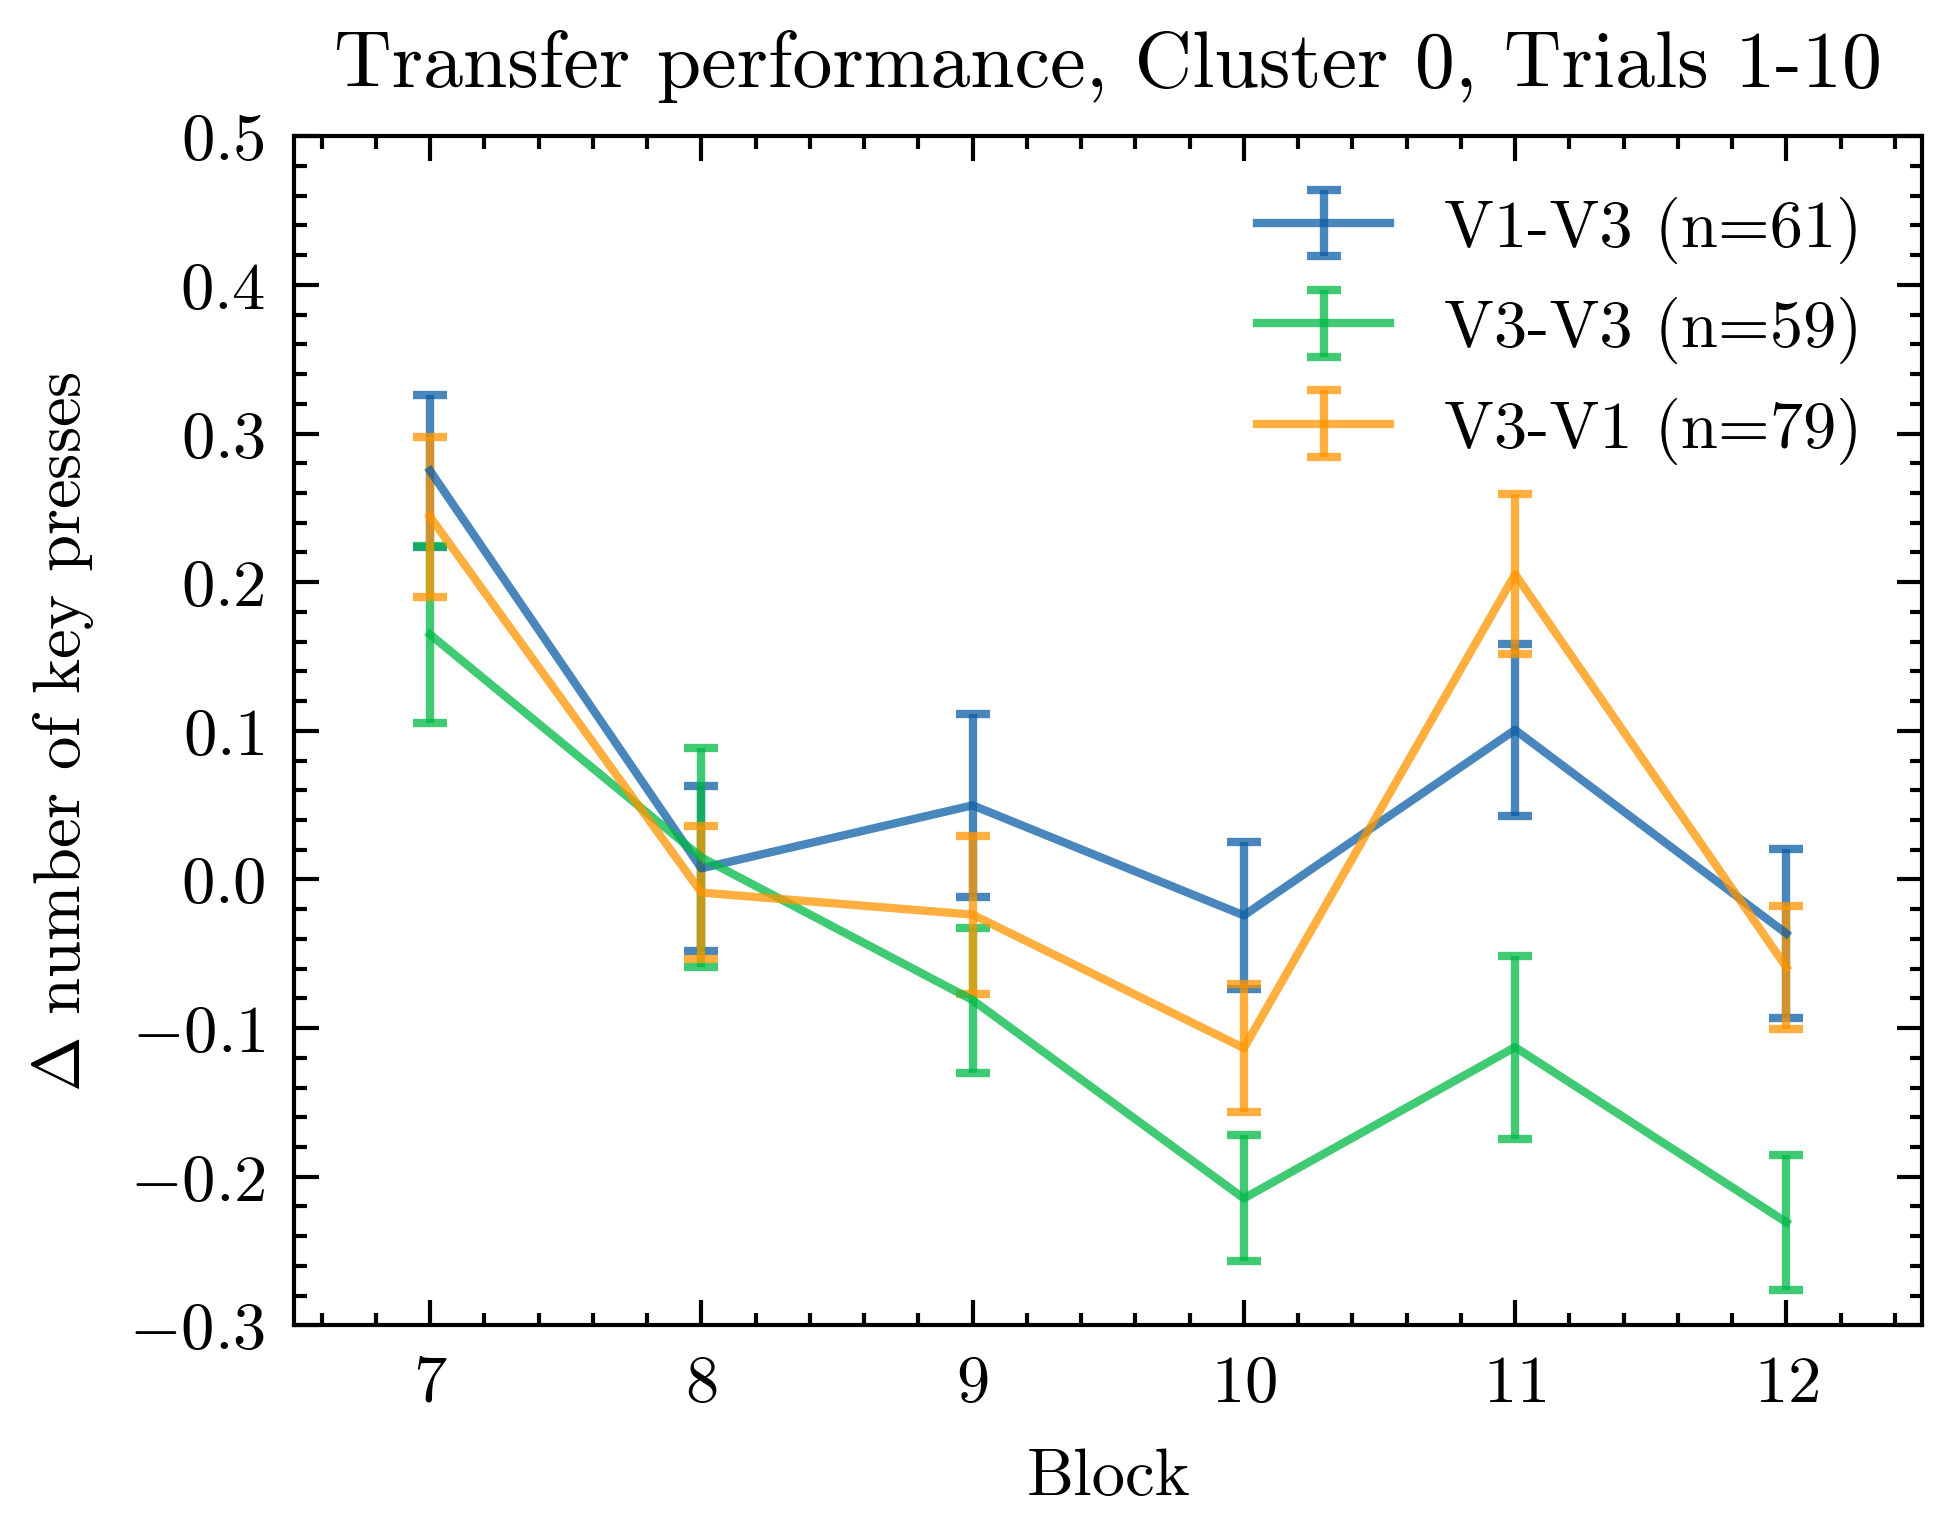

In [76]:
plotting.plot_transfer_learning_curves(all_data, meta_data, 'V1-V3', 'V3-V3', 'V3-V1', exp=[1,2], cluster=0, start_trial=0, trials_to_probe=10, first_press_accuracy=False, save_vector=True)

### V1-V1, V2-V2, V3-V3

/Users/JingjingLi/My Drive/Berkeley/CCN lab/OT-CA/OT-CA Jingjing/learning_hierarchy/helpers.py:918: RuntimeWarning: Mean of empty slice
  mean_population_counter1 = np.hstack((mean_population_counter1_12, np.nanmean(data_counter1[:,:,start_trial:int(start_trial+trials_to_probe)],axis=2)))
/Users/JingjingLi/My Drive/Berkeley/CCN lab/OT-CA/OT-CA Jingjing/learning_hierarchy/helpers.py:919: RuntimeWarning: Mean of empty slice
  mean_population_counter2 = np.hstack((mean_population_counter2_12, np.nanmean(data_counter2[:,:,start_trial:int(start_trial+trials_to_probe)],axis=2)))


One-sided paired t-test between Blocks 7 and 11 for V1-V1:
Ttest_relResult(statistic=3.283914044098074, pvalue=0.0006416779671005344)

One-sided paired t-test between Blocks 7 and 11 for V2-V2:
Ttest_relResult(statistic=2.494859579337248, pvalue=0.007385472389250694)

One-sided t-test between V1-V1 and V2-V2 on Block 11:
Ttest_indResult(statistic=-1.417044895212116, pvalue=0.9210610171778646)

One-sided paired t-test between Blocks 7 and 11 for V3-V3:
Ttest_relResult(statistic=5.588514712740049, pvalue=3.214475018762866e-07)

One-sided t-test between V2-V2 and V3-V3 on Block 11:
Ttest_indResult(statistic=-4.0455244995662865, pvalue=0.9999561462446457)


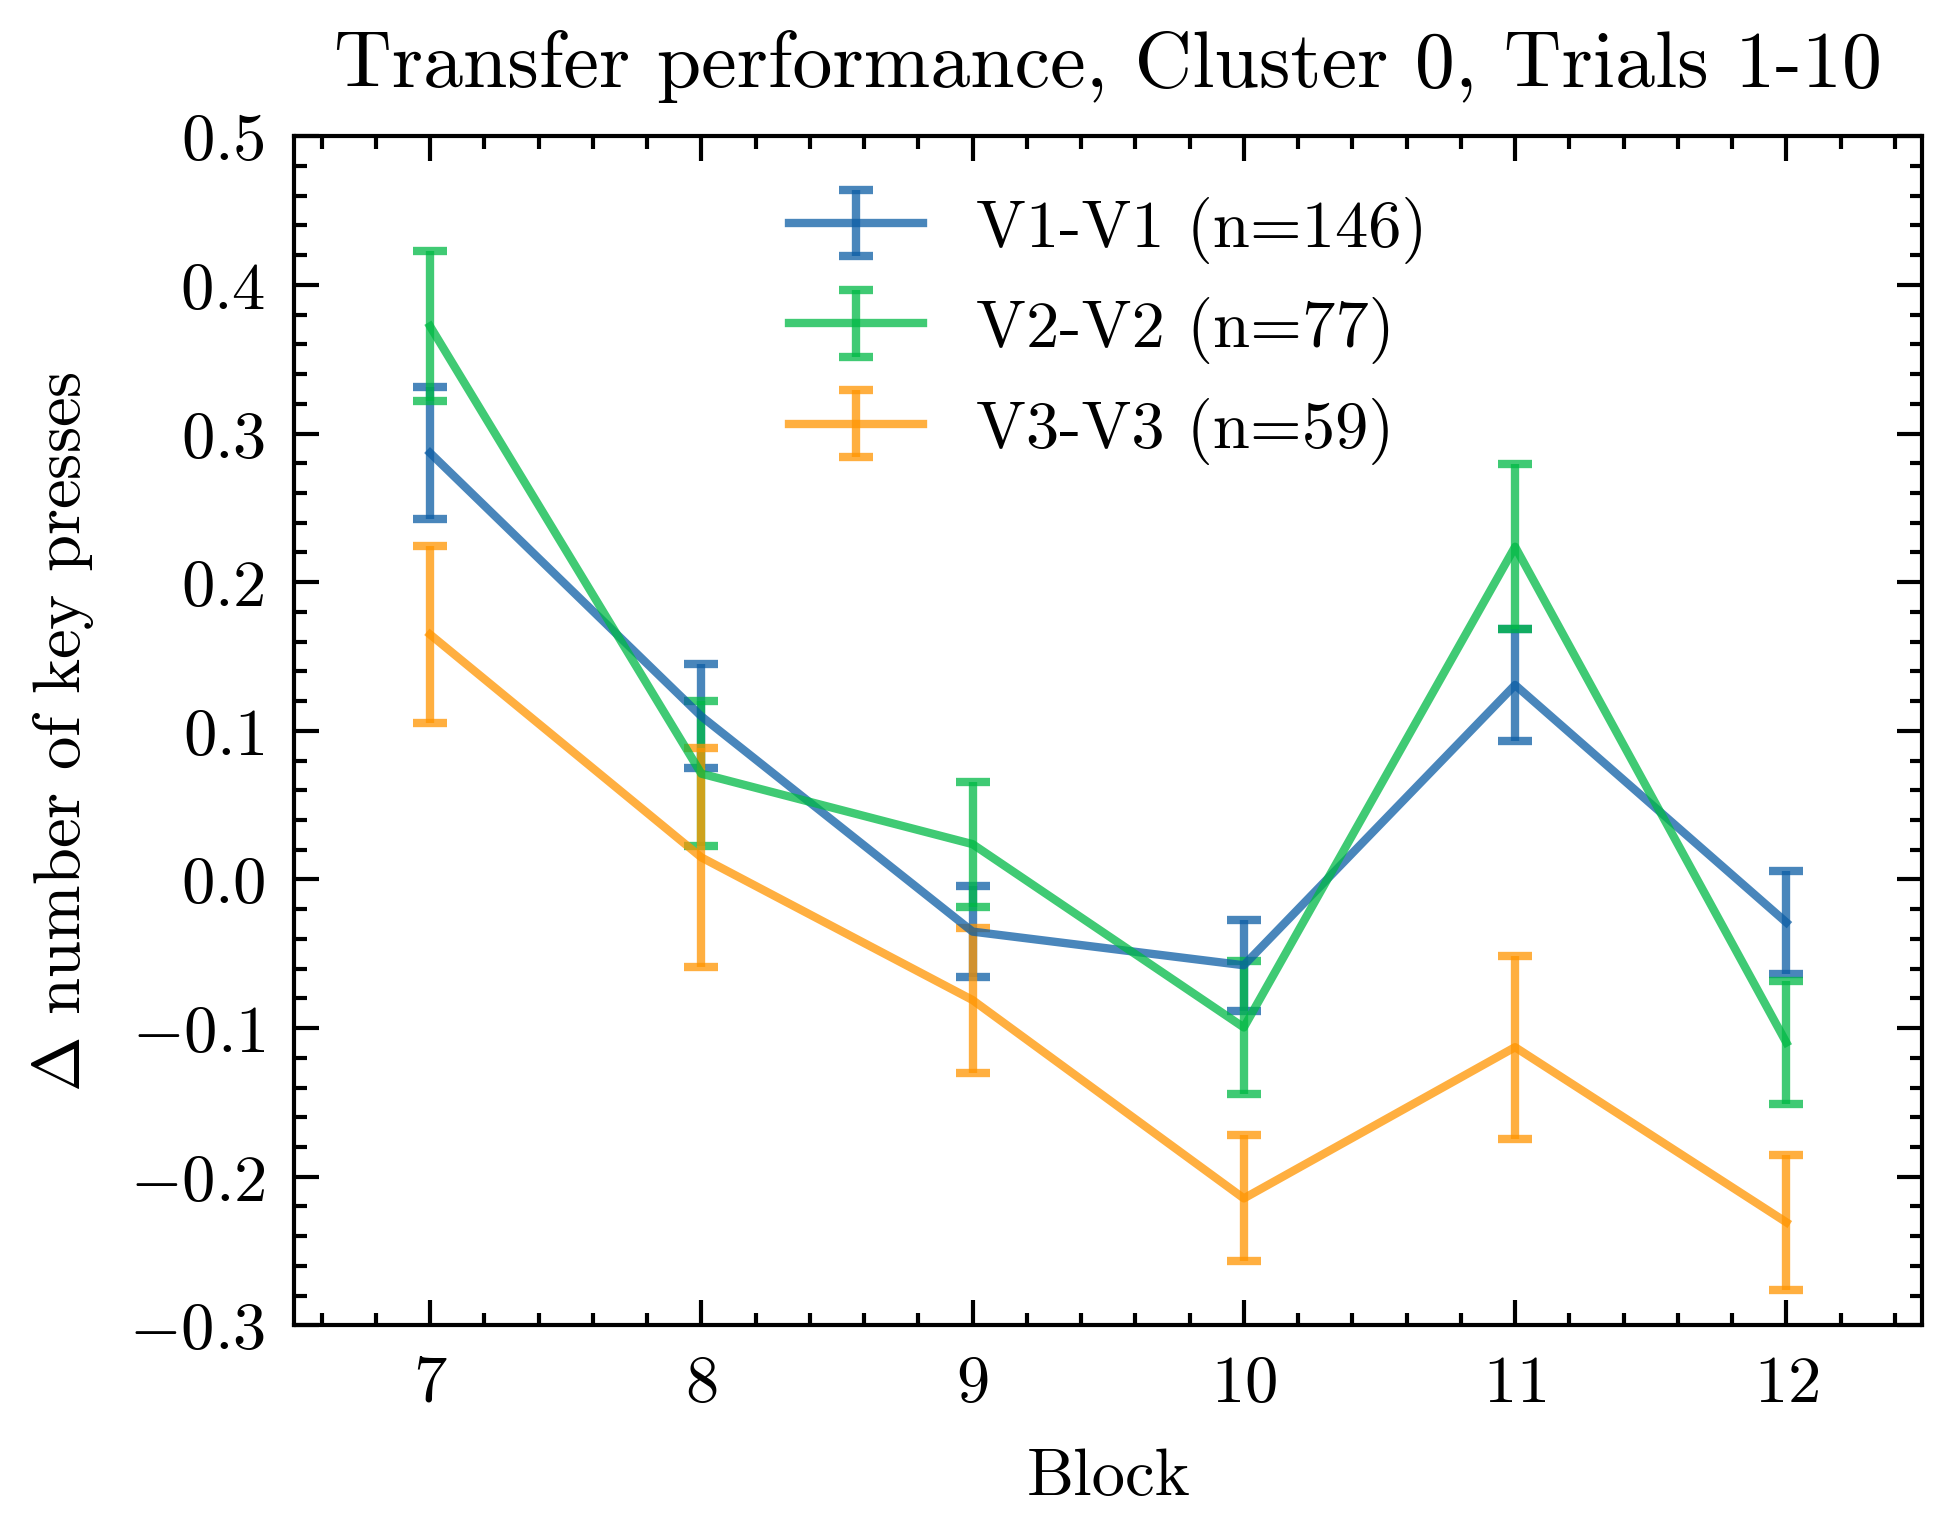

In [84]:
plotting.plot_transfer_learning_curves(all_data, meta_data, 'V1-V1', 'V2-V2', 'V3-V3', exp=[1,2], cluster=0, start_trial=0, trials_to_probe=10, first_press_accuracy=False, save_vector=True)

## Plot learning curves for Cluster 1

### V1-V1, V1-V2, V1-V3

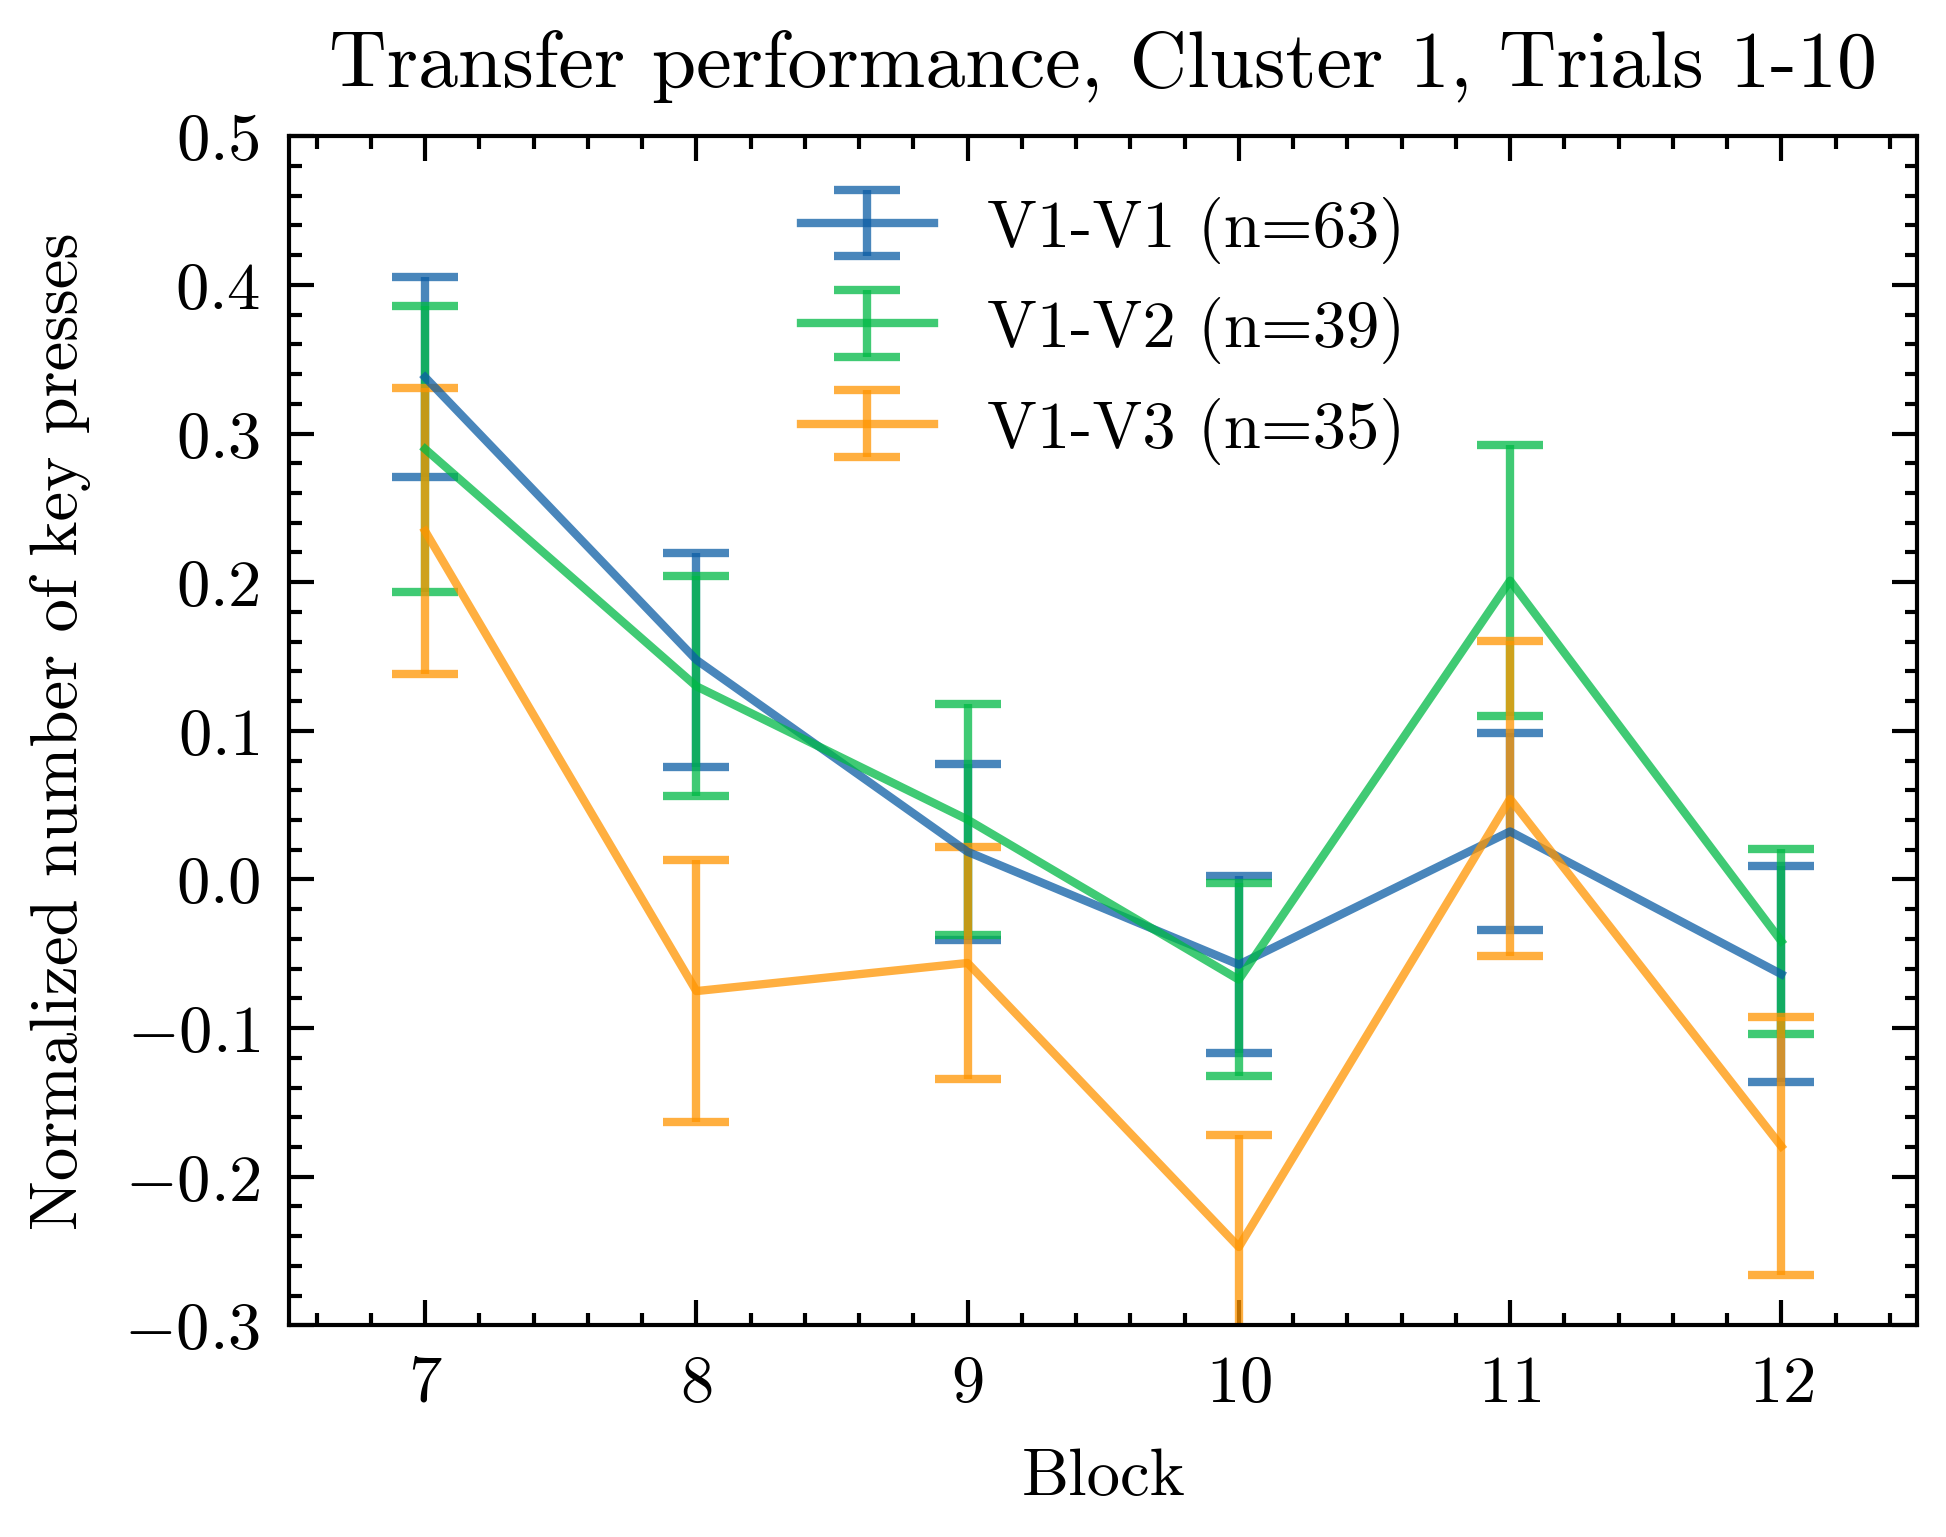

In [21]:
plotting.plot_transfer_learning_curves(all_data, meta_data, 'V1-V1', 'V1-V2', 'V1-V3', exp=[1,2], cluster=1, start_trial=0, trials_to_probe=10, first_press_accuracy=False, save_vector=True)

### V2-V1, V2-V2

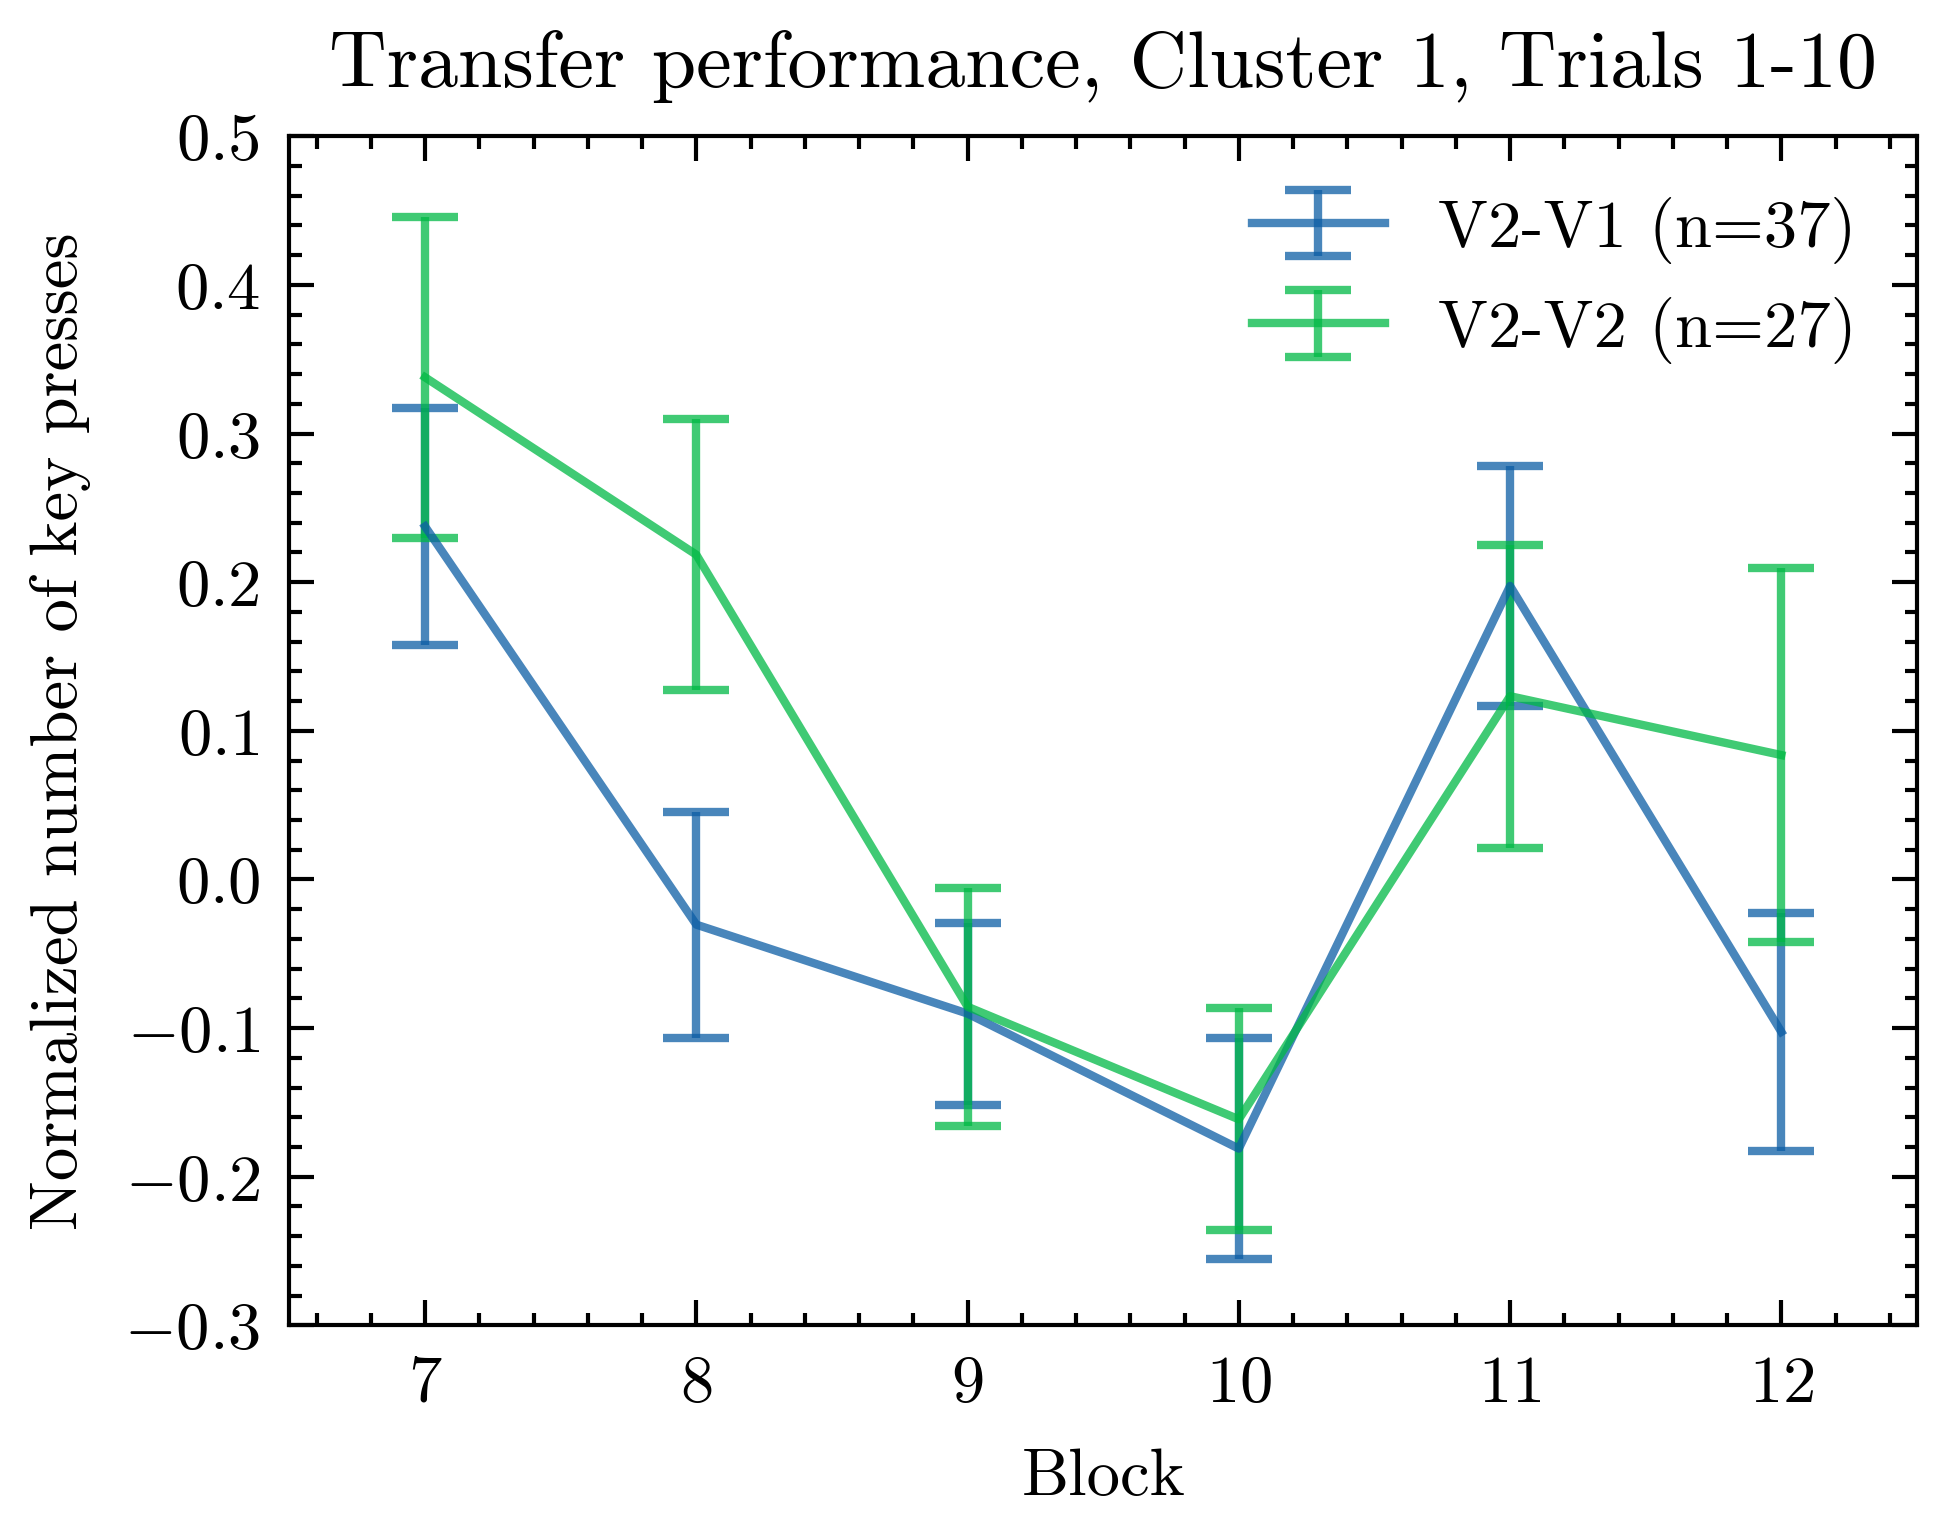

In [19]:
plotting.plot_transfer_learning_curves(all_data, meta_data, 'V2-V1', 'V2-V2', '', exp=[1,2], cluster=1, start_trial=0, trials_to_probe=10, first_press_accuracy=False, save_vector=True)

### V3-V1, V3-V3

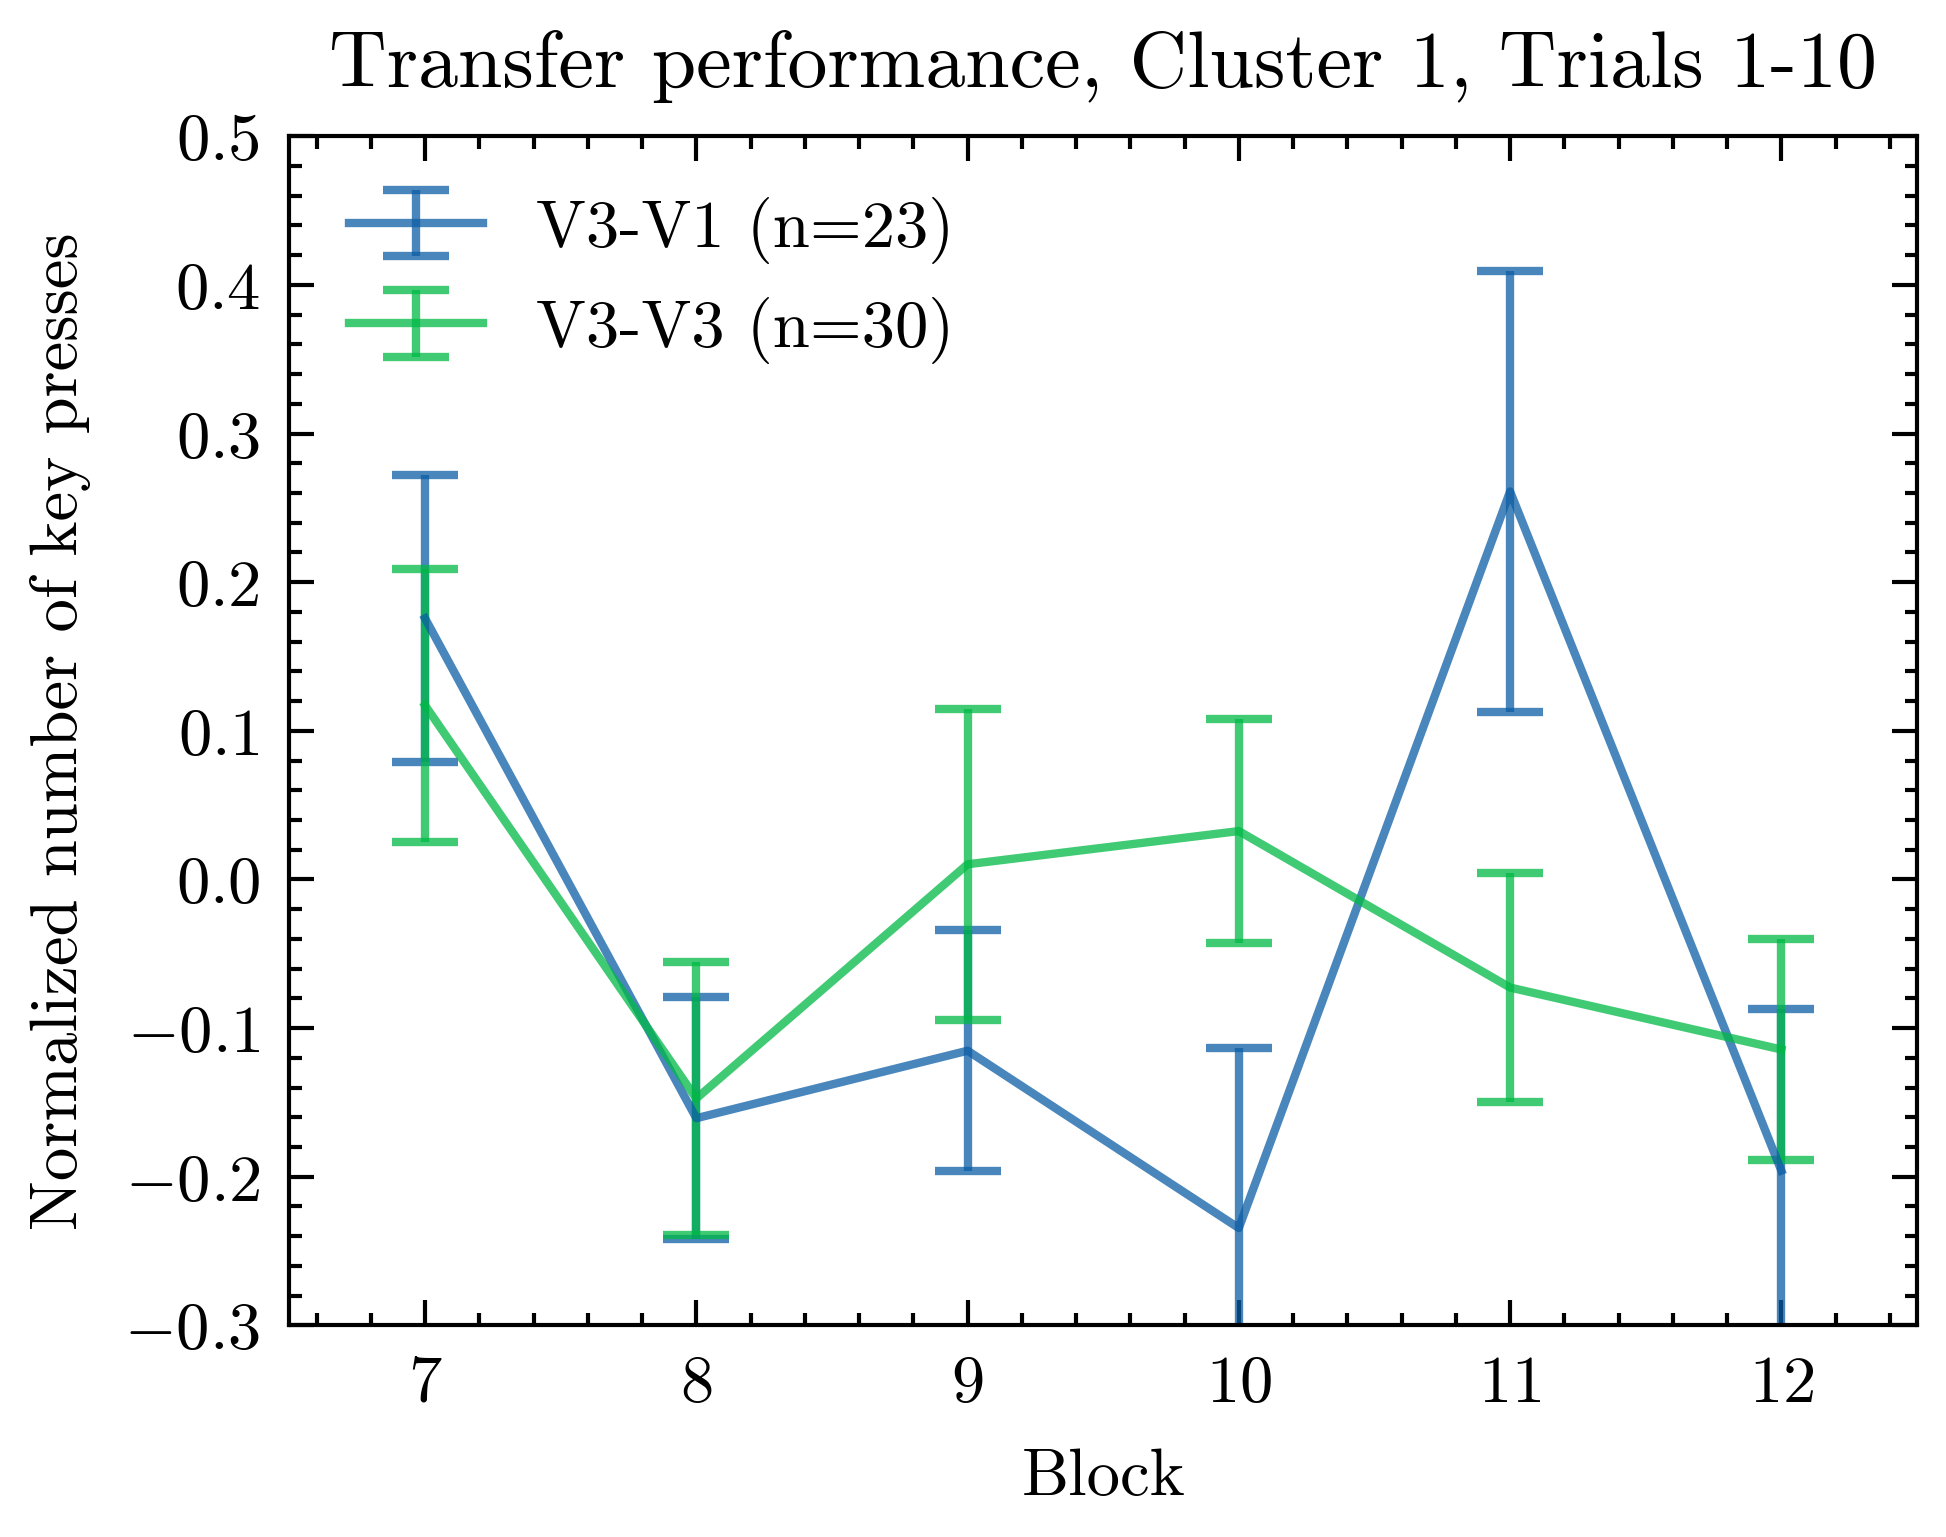

In [20]:
plotting.plot_transfer_learning_curves(all_data, meta_data, 'V3-V1', 'V3-V3', '', exp=[1,2], cluster=1, start_trial=0, trials_to_probe=10, first_press_accuracy=False, save_vector=True)

/Users/JingjingLi/My Drive/Berkeley/CCN lab/OT-CA/OT-CA Jingjing/learning_hierarchy/helpers.py:918: RuntimeWarning: Mean of empty slice
  mean_population_counter1 = np.hstack((mean_population_counter1_12, np.nanmean(data_counter1[:,:,start_trial:int(start_trial+trials_to_probe)],axis=2)))
/Users/JingjingLi/My Drive/Berkeley/CCN lab/OT-CA/OT-CA Jingjing/learning_hierarchy/helpers.py:919: RuntimeWarning: Mean of empty slice
  mean_population_counter2 = np.hstack((mean_population_counter2_12, np.nanmean(data_counter2[:,:,start_trial:int(start_trial+trials_to_probe)],axis=2)))
/Users/JingjingLi/My Drive/Berkeley/CCN lab/OT-CA/OT-CA Jingjing/learning_hierarchy/helpers.py:913: RuntimeWarning: Mean of empty slice
  mean_population_counter1_12[sub,0] = np.nanmean(data_counter12_12[sub,0,0,start_trial:int(start_trial+trials_to_probe)])


V1 vs V3: Ttest_indResult(statistic=2.0954844492050024, pvalue=0.018358843177580204)
V1 vs V2: Ttest_indResult(statistic=0.274878765537449, pvalue=0.6082323710952072)
V2 vs V3: Ttest_indResult(statistic=1.7705518326454472, pvalue=0.03882706744903668)


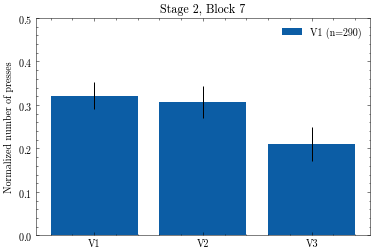

In [19]:
V1_data = helpers.slice_data(all_data, meta_data, 'V1', [1,2], 0)
V2_data = helpers.slice_data(all_data, meta_data, 'V2', [1,2], 0)
V3_data = helpers.slice_data(all_data, meta_data, 'V3', [1,2], 0)

num_subjects_1 = V1_data['tr'].shape[0]
num_subjects_2 = V2_data['tr'].shape[0]
num_subjects_3 = V3_data['tr'].shape[0]

_, n_presses_stage_2_1 = helpers.calc_mean(V1_data, start_trial=0, trials_to_probe=10)
n_presses_stage_2_1 -= np.nanmean(n_presses_stage_2_1[:,4:6], axis=1).reshape(-1,1)
_, n_presses_stage_2_2 = helpers.calc_mean(V2_data, start_trial=0, trials_to_probe=10)
n_presses_stage_2_2 -= np.nanmean(n_presses_stage_2_2[:,4:6], axis=1).reshape(-1,1)
_, n_presses_stage_2_3 = helpers.calc_mean(V3_data, start_trial=0, trials_to_probe=10)
n_presses_stage_2_3 -= np.nanmean(n_presses_stage_2_3[:,4:6], axis=1).reshape(-1,1)

v1_vs_v3 = stats.ttest_ind(n_presses_stage_2_1[:,6], n_presses_stage_2_3[:,6], alternative='greater')
v1_vs_v2 = stats.ttest_ind(n_presses_stage_2_1[:,6], n_presses_stage_2_2[:,6], alternative='less')
v2_vs_v3 = stats.ttest_ind(n_presses_stage_2_2[:,6], n_presses_stage_2_3[:,6], alternative='greater')

print(f'V1 vs V3: {v1_vs_v3}')
print(f'V1 vs V2: {v1_vs_v2}')
print(f'V2 vs V3: {v2_vs_v3}')

plt.bar(['V1', 'V2', 'V3'], [np.mean(n_presses_stage_2_1[:,6]), np.mean(n_presses_stage_2_2[:,6]), np.mean(n_presses_stage_2_3[:,6])], yerr=[stats.sem(n_presses_stage_2_1[:,6]), stats.sem(n_presses_stage_2_2[:,6]), stats.sem(n_presses_stage_2_3[:,6])])
plt.ylim([0, 0.5])
plt.ylabel('Normalized number of presses')
plt.title('Stage 2, Block 7')
plt.legend([f'V1 (n={num_subjects_1}), V2 (n={num_subjects_2}), V3 (n={num_subjects_3})'])
plt.savefig('plots/normalized_presses_block_7.svg', format='svg', dpi=1200)